In [1]:
from QEB import *

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# 创建3D图形对象
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(1, 11):
    # 生成数据
    rad = 0.01 * i
    num_points = min(int((rad**2 / 0.01**2) * 4), 30)
    points = generate_points_on_sphere(radius=rad, num_points=num_points)
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]

    # 绘制3D散点图
    ax.scatter3D(x, y, z)

# 设置图形属性
ax.set_title('3D Scatter Plot')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# 显示图形
plt.show()


In [2]:
MAX_RAD = 1
wqeb = WQEB()
data = wqeb.read_data(
    root_map='./dataset/emd_11103.map', 
    root_pdb='./dataset/6z6u.pdb',
    atomic="CA",
    max_rad = MAX_RAD, 
    base_num_points=2, 
    max_points=10
    )

/home/bookbnnbnn/work/Academia Sinica/Empirical_Bayes_Q-scores/QEB/utils.py:71: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = gb_defected.mean().reset_index()


  0%|          | 0/4128 [00:00<?, ?it/s]

In [ ]:
NUM = 10
IN_GROUP_NUM = 50
mse_0 = np.zeros((NUM, NUM))
mse_1 = np.zeros((NUM, NUM))
mse_hyper = np.zeros((NUM, NUM))
ratio_to_weights = np.zeros((NUM, NUM))
ratio_to_contaminated = np.zeros((NUM, NUM))
similarity = np.zeros((NUM, NUM))
wqeb = WQEB()
for i in tqdm(range(NUM)):
    contained_ratio_beta = 0.05 * i
    for j in range(NUM):
        contained_ratio_data = 0.05 * j
        wqeb.create_data(
            group_num=1, 
            group_name=["A"], 
            contained_ratio_data=contained_ratio_data, 
            contained_ratio_beta=contained_ratio_beta, 
            in_group_num=IN_GROUP_NUM
            )
        wqeb.paramters_initial()
        wqeb.algorithm_iter(iter_num=20, alpha=contained_ratio_data, gamma=contained_ratio_beta, verbose=False)
        mse_0[i][j], mse_1[i][j] = np.mean((wqeb.betas["A"] - wqeb.betas_WEB["A"])**2, axis=0)
        mse_hyper[i][j] = np.sum((wqeb.mus["A"] - wqeb.mus_mle["A"])**2) / 2
        ratio_to_weights[i][j] = np.mean(wqeb.lambdas["A"] / 500)
        ratio_to_contaminated[i][j] = np.median(wqeb.lambdas["A"][int(IN_GROUP_NUM * contained_ratio_data): ]) / np.median(wqeb.lambdas["A"][: int(IN_GROUP_NUM * contained_ratio_data)])
        similarity[i][j] = np.mean(wqeb.similarities["A"])

  0%|          | 0/10 [00:00<?, ?it/s]

/home/bookbnnbnn/miniconda3/envs/ai_cup3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bookbnnbnn/miniconda3/envs/ai_cup3.10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/bookbnnbnn/work/Academia Sinica/Empirical_Bayes_Q-scores/QEB/utils.py:559: RuntimeWarning: Mean of empty slice.
  mean_densities.append(densities_chosen.mean())


In [ ]:
# wqeb = WQEB()
# wqeb.create_data(
#             group_num=1, 
#             group_name=["A"], 
#             contained_ratio_data=0.14, 
#             contained_ratio_beta=0.2, 
#             in_group_num=1
#             )

In [ ]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

def simulation_plot(data, zlabel, title, min_num=0, max_num=0.5):
    z = data
    nrows, ncols = z.shape
    x = np.linspace(min_num, max_num, ncols)
    y = np.linspace(min_num, max_num, nrows)
    x, y = np.meshgrid(x, y)

    # Set up plot
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), constrained_layout=True)

    ls = LightSource(270, 45)
    # To use a custom hillshading mode, override the built-in shading and pass
    # in the rgb colors of the shaded surface calculated from "shade".
    rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
    surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                        linewidth=0, antialiased=False, shade=False)    
    ax.set_xlabel("Contaminated ratio of points")
    ax.set_ylabel("Contaminated ratio of betas")
    ax.set_zlabel(zlabel, rotation=90, labelpad=-0.6)
    ax.dist = 11
    # ax.zaxis.labelpad = -0.6
    plt.title(title)
    plt.savefig("../figures/" + title)
    plt.show()

/tmp/ipykernel_10386/1732115093.py:26: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


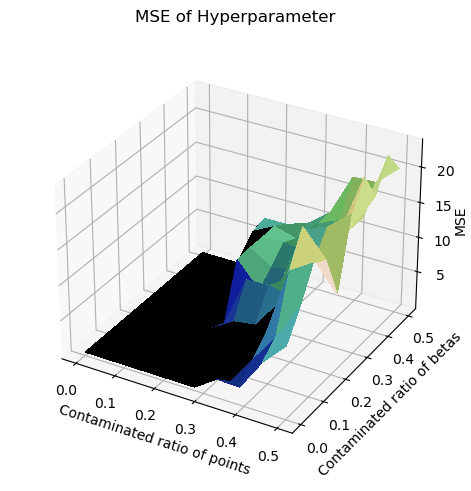

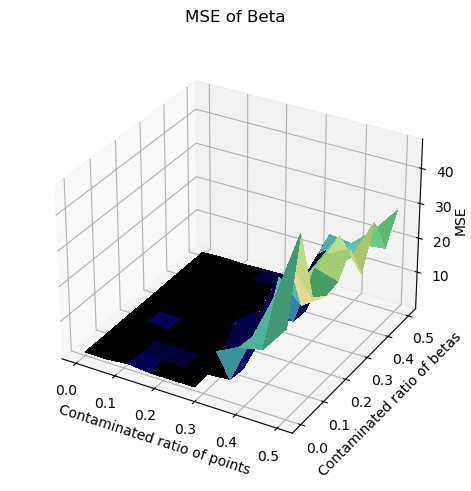

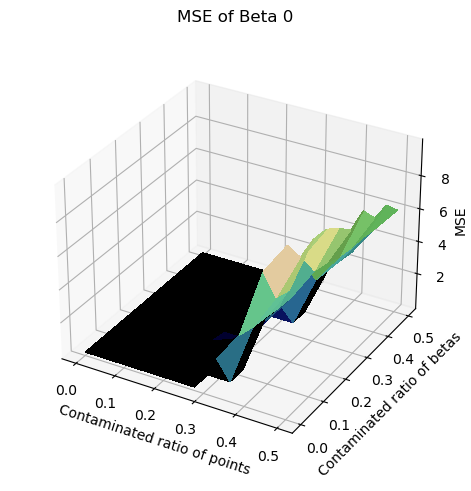

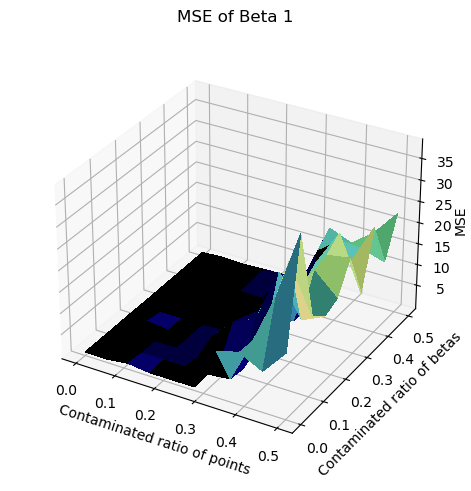

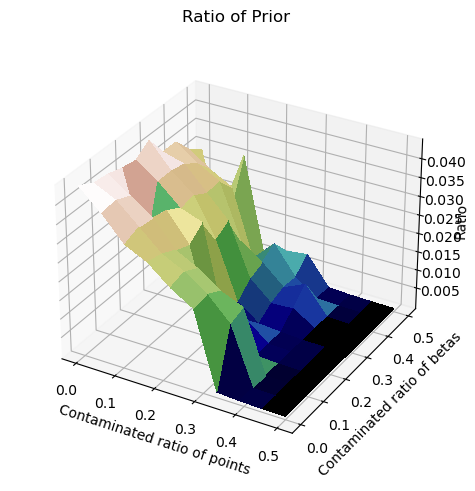

In [ ]:
simulation_plot(mse_hyper, "MSE", "MSE of Hyperparameter")
simulation_plot(mse_0 + mse_1, "MSE", "MSE of Beta")
simulation_plot(mse_0, "MSE", "MSE of Beta 0")
simulation_plot(mse_1, "MSE", "MSE of Beta 1")
simulation_plot(ratio_to_weights, "Ratio", "Ratio of Prior")
# simulation_plot(A, "Ratio", "Ratio of Contaminated Data")
# simulation_plot(similarity, "Similarity", "Fitted Similarity")

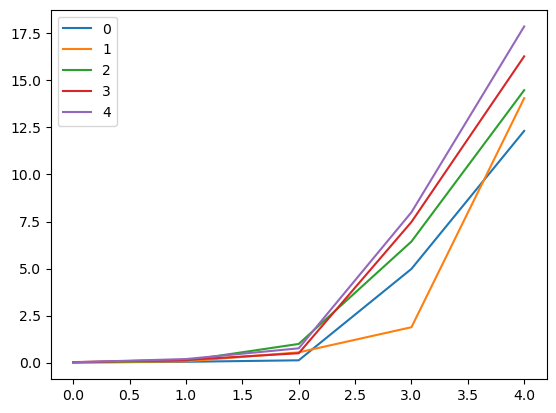

In [ ]:
for i in range(NUM):
    plt.plot(mse_0[i], label=i)
plt.legend()

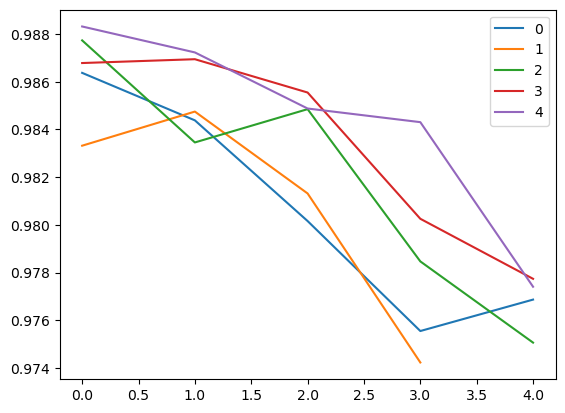

In [ ]:
for i in range(NUM):
    plt.plot(similarity[i], label=i)
plt.legend()

In [2]:
wqeb = WQEB()
data = wqeb.create_data(group_num=1, group_name=["A"], contained_ratio_data=0.2, contained_ratio_beta=0.2, in_group_num = 100)

In [ ]:
plt.scatter(wqeb.distances_to_center["A"].flatten(), wqeb.data_log["A"].flatten())

In [ ]:
num = int(490 * 0.2)
np.argpartition(np.array(A), num)[num:]

array([], shape=(0, 490), dtype=int64)

In [ ]:
num

98

In [ ]:
np.argpartition(np.array(A), num)[num:]

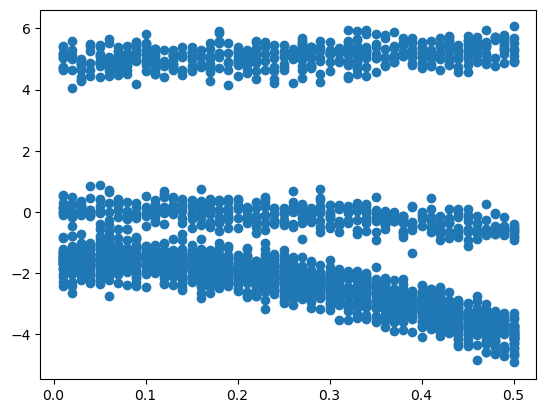

In [ ]:
plt.scatter(wqeb.distances_to_center["A"].flatten(), wqeb.data_log["A"].flatten())

In [3]:
_ = wqeb.paramters_initial()

In [4]:
betas_WEB, history = wqeb.algorithm_iter(max_iter=20, alpha=0.2, gamma=0.2, tol=1e-4)

  0%|          | 0/20 [00:00<?, ?it/s]

INFO:root:Iteration 0 finished. with difference: 9.819205745564188
INFO:root:Iteration 1 finished. with difference: 7.977407428790529
INFO:root:Iteration 2 finished. with difference: 0.055190654462876805
INFO:root:Iteration 3 finished. with difference: 0.025491327473882584
INFO:root:Iteration 4 finished. with difference: 0.010815923775109745
INFO:root:Iteration 5 finished. with difference: 0.00476325718317964
INFO:root:Iteration 6 finished. with difference: 0.0027624486624138467
INFO:root:Iteration 7 finished. with difference: 0.001808808037643389
INFO:root:Iteration 8 finished. with difference: 0.0012050970407174624
INFO:root:Iteration 9 finished. with difference: 0.0008842581655415952
INFO:root:Iteration 10 finished. with difference: 0.000660623061300754
INFO:root:Iteration 11 finished. with difference: 0.0004907212193638373
INFO:root:Iteration 12 finished. with difference: 0.0003800578494625399
INFO:root:Iteration 13 finished. with difference: 0.00033123626528912405
INFO:root:Iterat

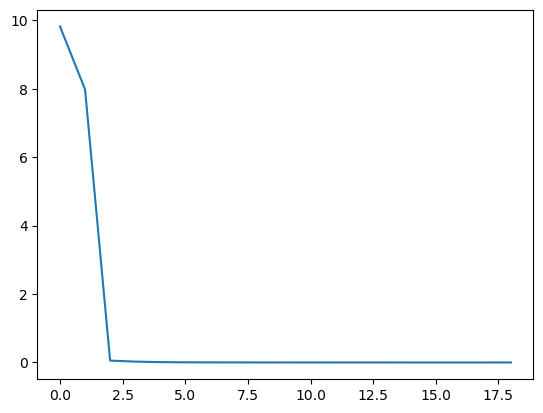

In [5]:
plt.plot(wqeb.beta_differences_histories)

In [ ]:
wqeb.betas_WEB["ALA"][:, 0]

(2, 288)

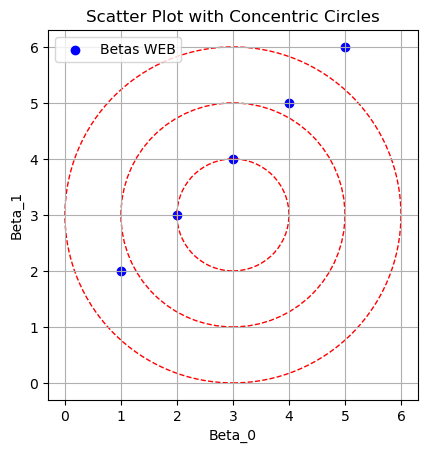

In [68]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def plot_scatter_with_concentric_circles(data, center_x, center_y, num_circles, spacing):
    fig, ax = plt.subplots()

    # 绘制散点图
    x = data[:, 0]
    y = data[:, 1]
    ax.scatter(x, y, color='blue', label='Betas WEB')

    # 绘制同心圆
    for i in range(1, num_circles + 1):
        radius = i * spacing
        circle = Circle((center_x, center_y), radius, fill=False, color='red', linestyle='dashed')
        ax.add_patch(circle)

    max_radius = num_circles * spacing + spacing
    # ax.set_xlim(center_x - max_radius, center_x + max_radius)
    # ax.set_ylim(center_y - max_radius, center_y + max_radius)
    ax.set_aspect('equal', adjustable='box')
    plt.gca().set_aspect('equal', adjustable='box')

    plt.title('Scatter Plot with Concentric Circles')
    plt.xlabel('Beta_0')
    plt.ylabel('Beta_1')
    plt.grid(True)
    plt.legend()
    plt.show()

# 示例数据
data = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])

# 以坐标(3, 3)为圆心，每个同心圆的间距为1，绘制3个同心圆并添加到散点图上
plot_scatter_with_concentric_circles(data, 3, 3, 3, 1)

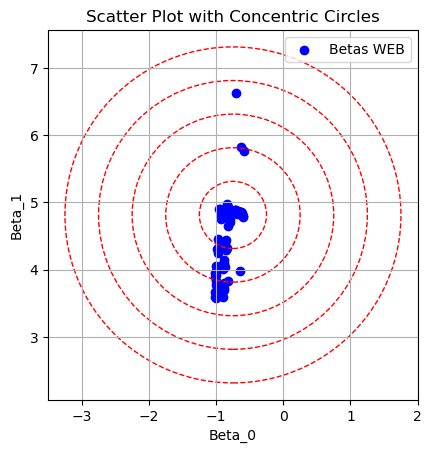

In [75]:
name = "VAL"
plot_scatter_with_concentric_circles(wqeb.betas_WEB[name], *wqeb.mus_mle[name], 5, 0.5)

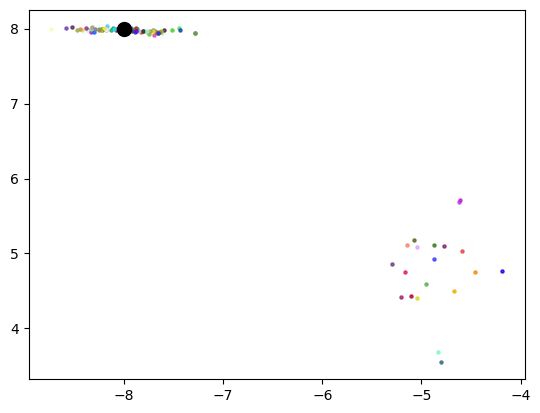

In [16]:
name = "A"
import matplotlib
# colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(wqeb.betas_WEB[name])))
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])for i in range(len(wqeb.betas_WEB[name]))]
for i in range(len(wqeb.betas_WEB[name])):
    plt.scatter(wqeb.betas_WEB[name][i][0], wqeb.betas_WEB[name][i][1], color=colors[i], alpha=0.8, s=5)
    # plt.scatter(wqeb.betas[name][i][0], wqeb.betas[name][i][1], color=colors[i], alpha=0.8, s=5)

# plt.scatter(wqeb.betas_WEB[name][:, 0], wqeb.betas_WEB[name][:, 1])
# plt.scatter(wqeb.betas[name][:, 0], wqeb.betas[name][:, 1])
plt.scatter(*wqeb.mus_mle[name], s=100, color="black")

In [70]:
sigma_hat0 = sum((wqeb.betas_WEB[name][:, 0] - wqeb.mus_mle[name][0])**2 * wqeb.lambdas[name]) / sum(wqeb.lambdas[name])
sigma_hat1 = sum((wqeb.betas_WEB[name][:, 1] - wqeb.mus_mle[name][1])**2 * wqeb.lambdas[name]) / sum(wqeb.lambdas[name])

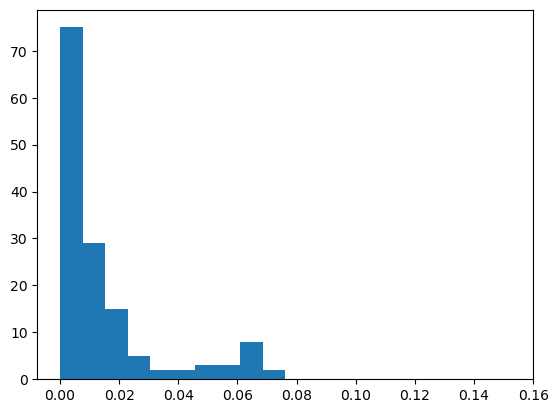

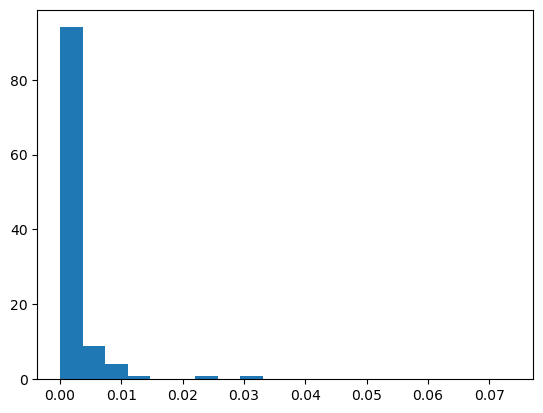

In [71]:
plt.hist((wqeb.betas_WEB[name][:, 0] - wqeb.mus_mle[name][0])**2, bins=[sigma_hat0 * i for i in range(0, 21) ])
plt.show()
plt.hist((wqeb.betas_WEB[name][:, 1] - wqeb.mus_mle[name][1])**2, bins=[sigma_hat1 * i for i in range(0, 21) ])
plt.show()

In [72]:
outliers0 = wqeb.betas_WEB[name][(wqeb.betas_WEB[name][:, 0] - wqeb.mus_mle[name][0])**2 / sigma_hat0 > chi2.interval(0.90, 1)[1]]
outliers1 = wqeb.betas_WEB[name][(wqeb.betas_WEB[name][:, 1] - wqeb.mus_mle[name][1])**2 / sigma_hat0 > chi2.interval(0.90, 1)[1]]

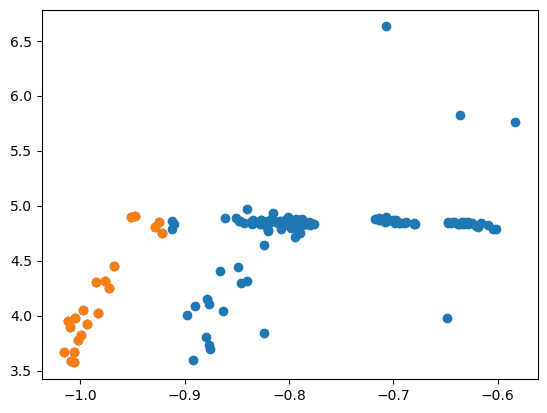

In [80]:
plt.scatter(wqeb.betas_WEB[name][:, 0], wqeb.betas_WEB[name][:, 1])
plt.scatter(outliers0[:, 0], outliers0[:, 1])

In [34]:
chi2.interval(0.90, 1)

(0.00393214000001952, 3.841458820694124)

In [31]:
from scipy.stats import multivariate_normal, chi2
_, margin = chi2.interval(0.95, 1)

(array([58., 14.,  8.,  9.,  3.,  2.,  1.,  0.,  1.,  0.,  0.,  2.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([8.51058650e-05, 5.81169466e-02, 1.16148787e-01, 1.74180628e-01,
        2.32212469e-01, 2.90244310e-01, 3.48276150e-01, 4.06307991e-01,
        4.64339832e-01, 5.22371673e-01, 5.80403513e-01, 6.38435354e-01,
        6.96467195e-01, 7.54499036e-01, 8.12530877e-01, 8.70562717e-01,
        9.28594558e-01, 9.86626399e-01, 1.04465824e+00, 1.10269008e+00,
        1.16072192e+00]),
 <BarContainer object of 20 artists>)

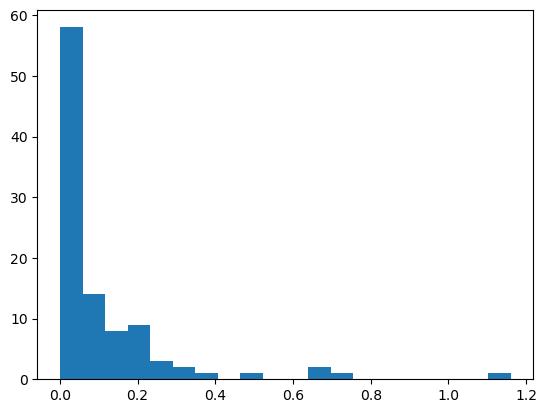

In [22]:
plt.hist(np.sum((wqeb.betas_WEB["A"] - wqeb.betas["A"])**2, axis=1), bins=20)

(array([20.,  0.,  0.,  1.,  2.,  8., 22., 27., 14.,  6.]),
 array([2.79032287e-15, 2.06231674e+00, 4.12463348e+00, 6.18695021e+00,
        8.24926695e+00, 1.03115837e+01, 1.23739004e+01, 1.44362172e+01,
        1.64985339e+01, 1.85608506e+01, 2.06231674e+01]),
 <BarContainer object of 10 artists>)

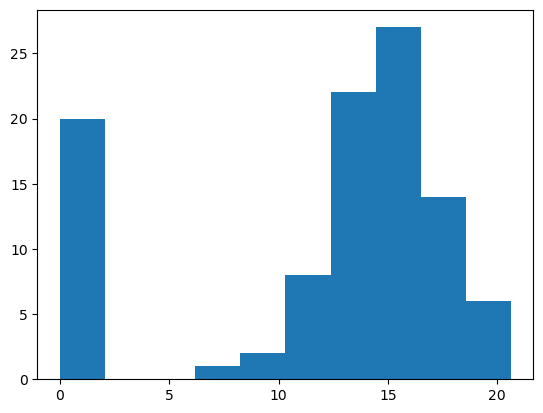

In [41]:
plt.hist(wqeb.lambdas["A"])

In [ ]:
_ = wqeb.weighted_linear_regression(max_iter=5, alpha=0.1, gamma=0.1)

  0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
for name in wqeb.similarities:
    print(name, np.min(wqeb.similarities[name]))

ALA 0.9864588902756948
ARG 0.9888537407873049
ASN 0.9835532256957427
ASP 0.9754650499408837
CYS 0.9963410971151937
GLN 0.9871950188558778
GLU 0.9636873788599217
GLY 0.9850953142433098
HIS 0.9894264590482773
ILE 0.9836361071579502
LEU 0.9841244348166739
LYS 0.9917880747945985
MET 0.9836771867178503
PHE 0.9932503296100125
PRO 0.9826943891566021
SER 0.8203125705705667
THR 0.9904450968004657
TRP 0.989078392123021
TYR 0.99227769587423
VAL 0.9912320115137275


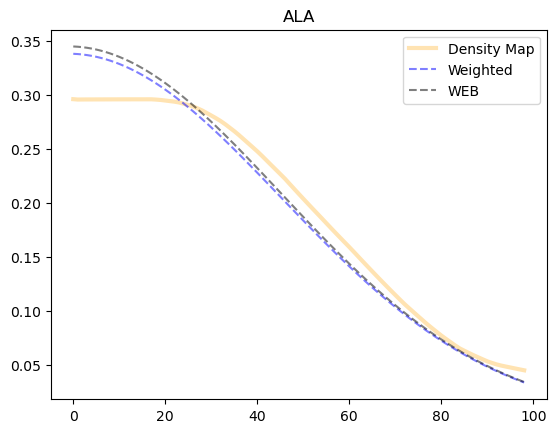

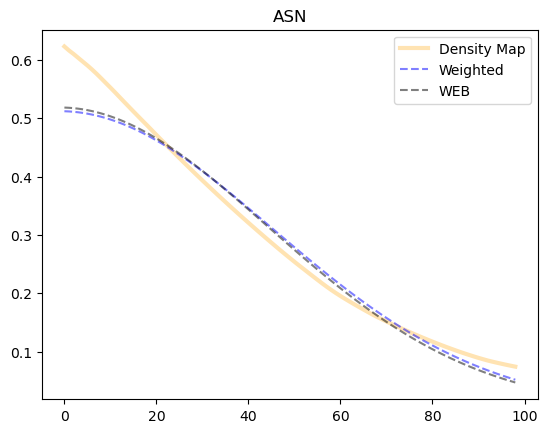

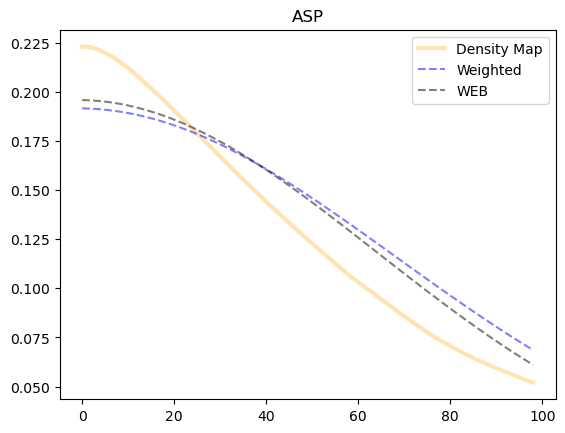

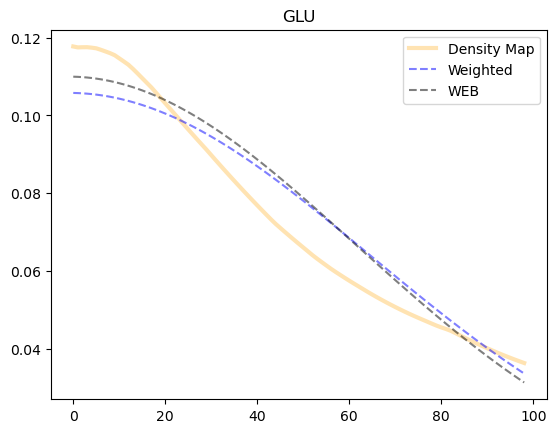

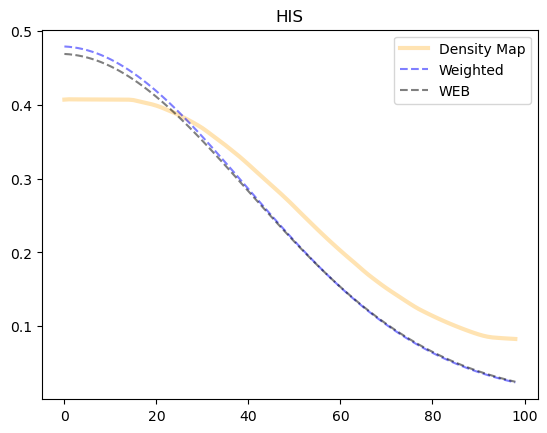

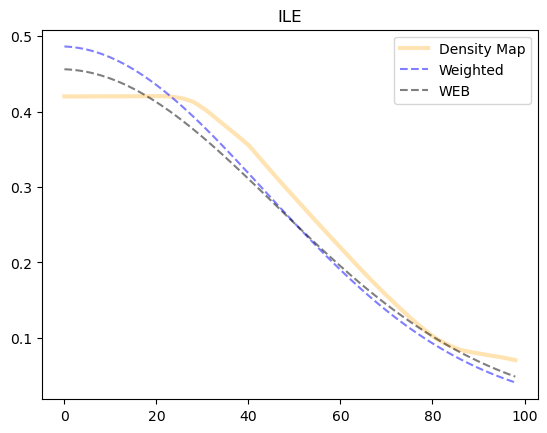

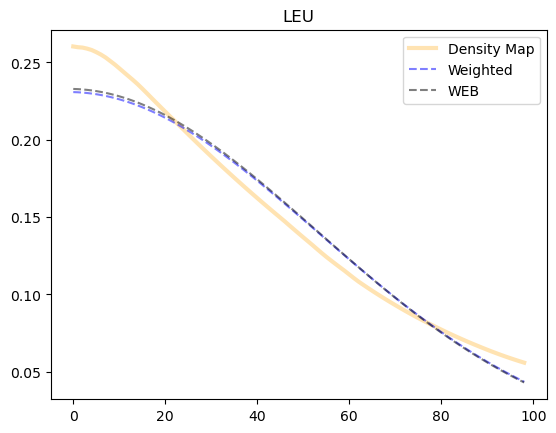

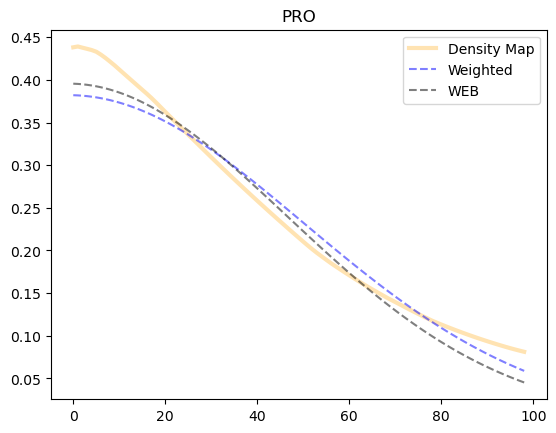

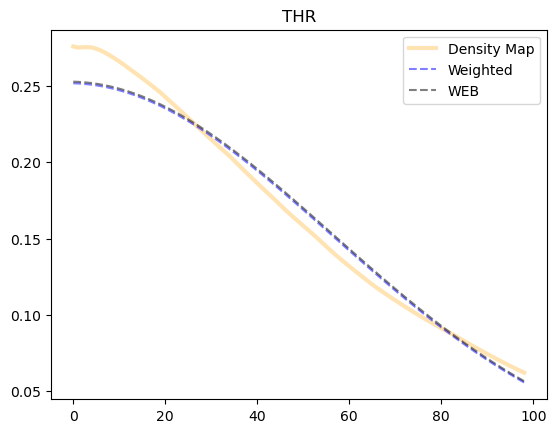

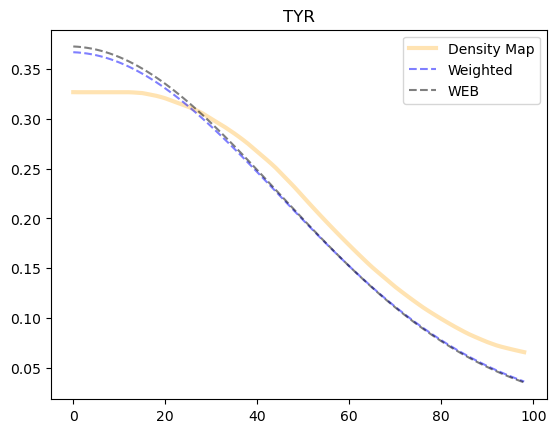

In [ ]:
for name in wqeb.similarities:
    index = np.where(wqeb.similarities[name] == np.min(wqeb.similarities[name]))[0][0]
    plt.plot(wqeb.densities_data[name][index], linewidth=3, alpha=0.3, c="orange", label="Density Map")
    plt.plot(wqeb.densities_betas_weighted[name][index], linestyle="--", c="blue", alpha=0.5, label="Weighted")
    plt.plot(wqeb.densities_betas_WEB[name][index], linestyle="--", c="black", alpha=0.5, label="WEB")
    plt.legend()
    plt.title(name)
    plt.show()

In [ ]:
max_radius = 1
gap = 0.01
subplots_num = len(densities_outliers)
nums = int(subplots_num / 5) + 1 if subplots_num % 5 != 0 else int(subplots_num / 5)
fig, axes = plt.subplots(nums, 5, figsize=(25, nums * 4), sharex=True, sharey=True, squeeze=False)
x = np.arange(0, max_radius - gap, gap)
length = len(x)

for times, name in enumerate(densities_outliers): 
    i = times // 5
    j = times % 5
    for density in wqeb.densities_data[name]:
        axes[i][j].plot(x, density[:length], linewidth=3, alpha=0.3, c="orange", label="map")
    for density_outliers in densities_outliers[name]:
        axes[i][j].plot(x, density_outliers[:length], linewidth=3, alpha=1, c="black", label="outliers")
    axes[i][j].set_title(name)

labels_handles = {
label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

fig.legend(
labels_handles.values(),
labels_handles.keys(),
loc = "upper center",
bbox_to_anchor = (0.1, 0.065),
bbox_transform = plt.gcf().transFigure,
)
fig.supxlabel('Radius')
fig.supylabel('Density')
plt.tight_layout()
fig.tight_layout(rect=(0.025, 0.03, 1, 1))
fig.savefig("../figures/outliers_beta1.png")

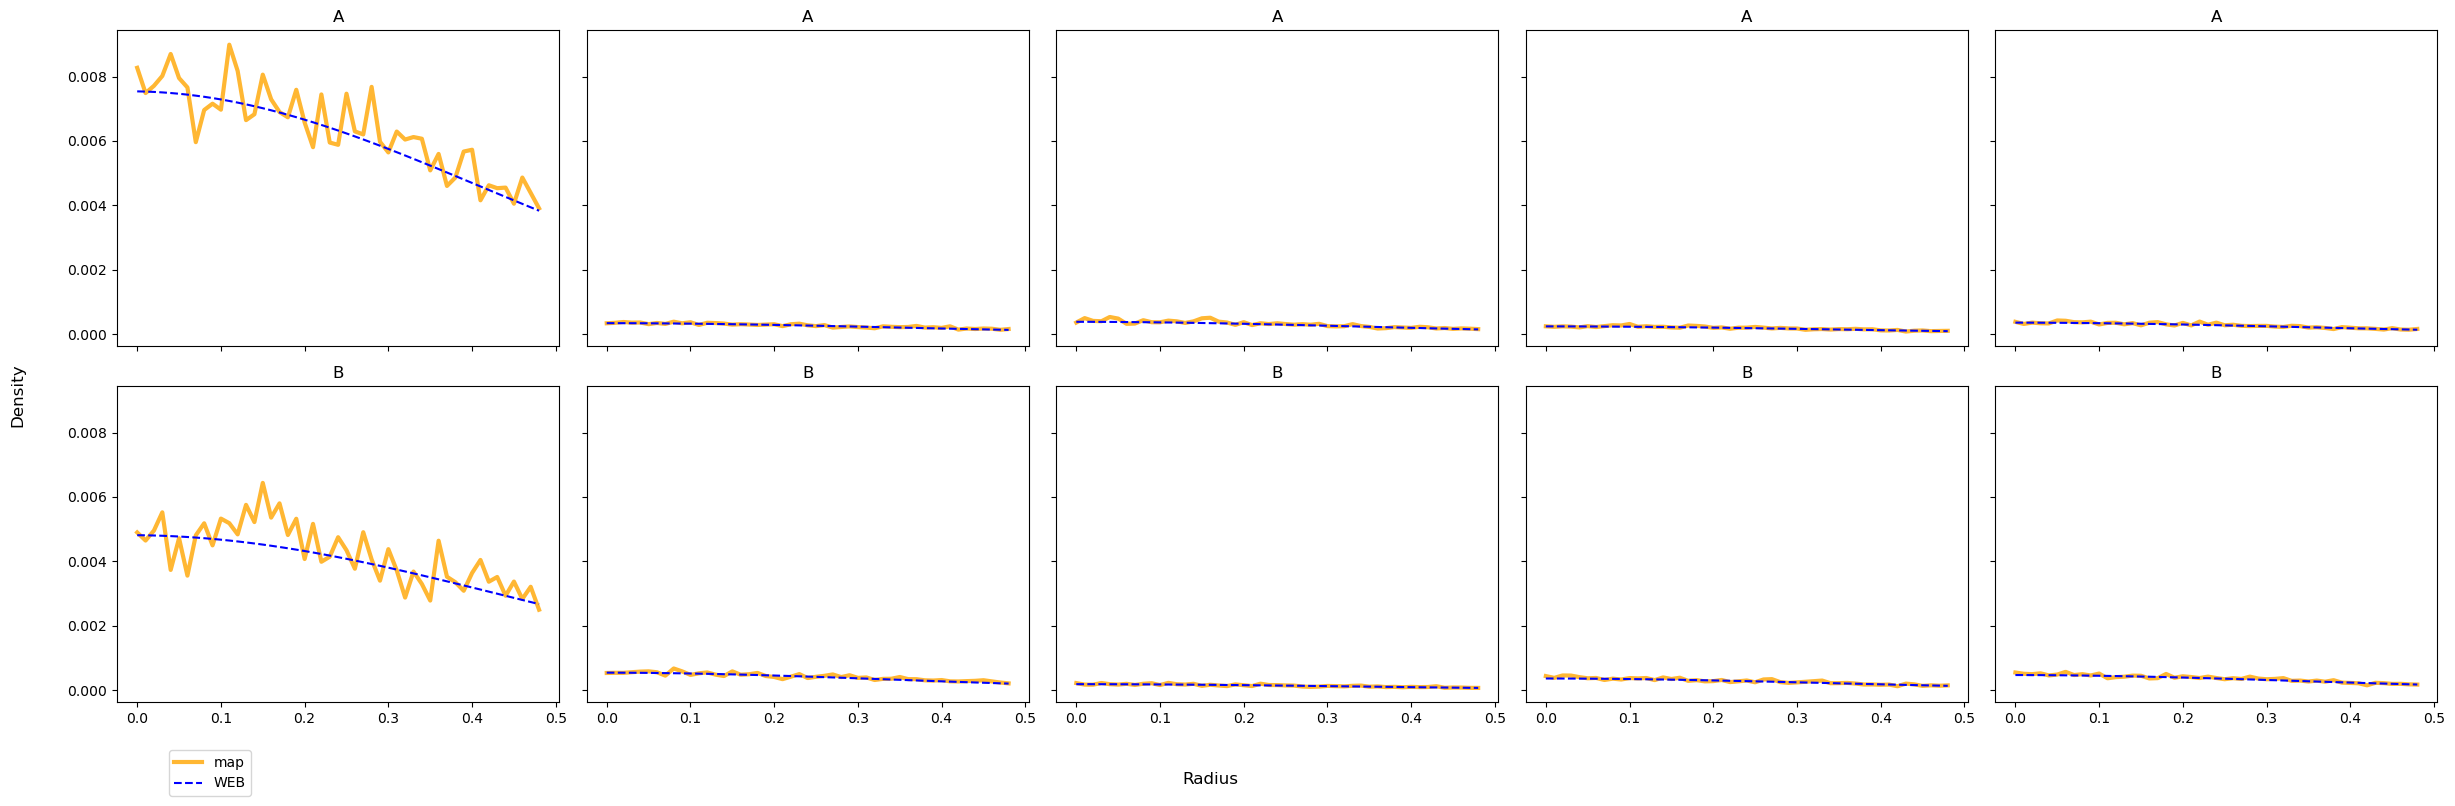

In [ ]:
plot_density(wqeb.densities_data, [wqeb.densities_betas_WEB], 0.5, 0.01, labels=["WEB"], colors=["blue"], subplots_num=10, seperated=True)
plt.savefig("../figures/densities_fitted_result")

In [ ]:
# lengths = 0
# for name, similarities in wqeb.similarities.items():
#     indexes = np.where(np.array(similarities) < 0.95)[0]
#     lengths += len(indexes)
#     for idx in indexes:
#         plt.plot(wqeb.densities_data[name][idx])
#         plt.plot(wqeb.densities_estimated[name][idx])
#         plt.show()
# # lengths

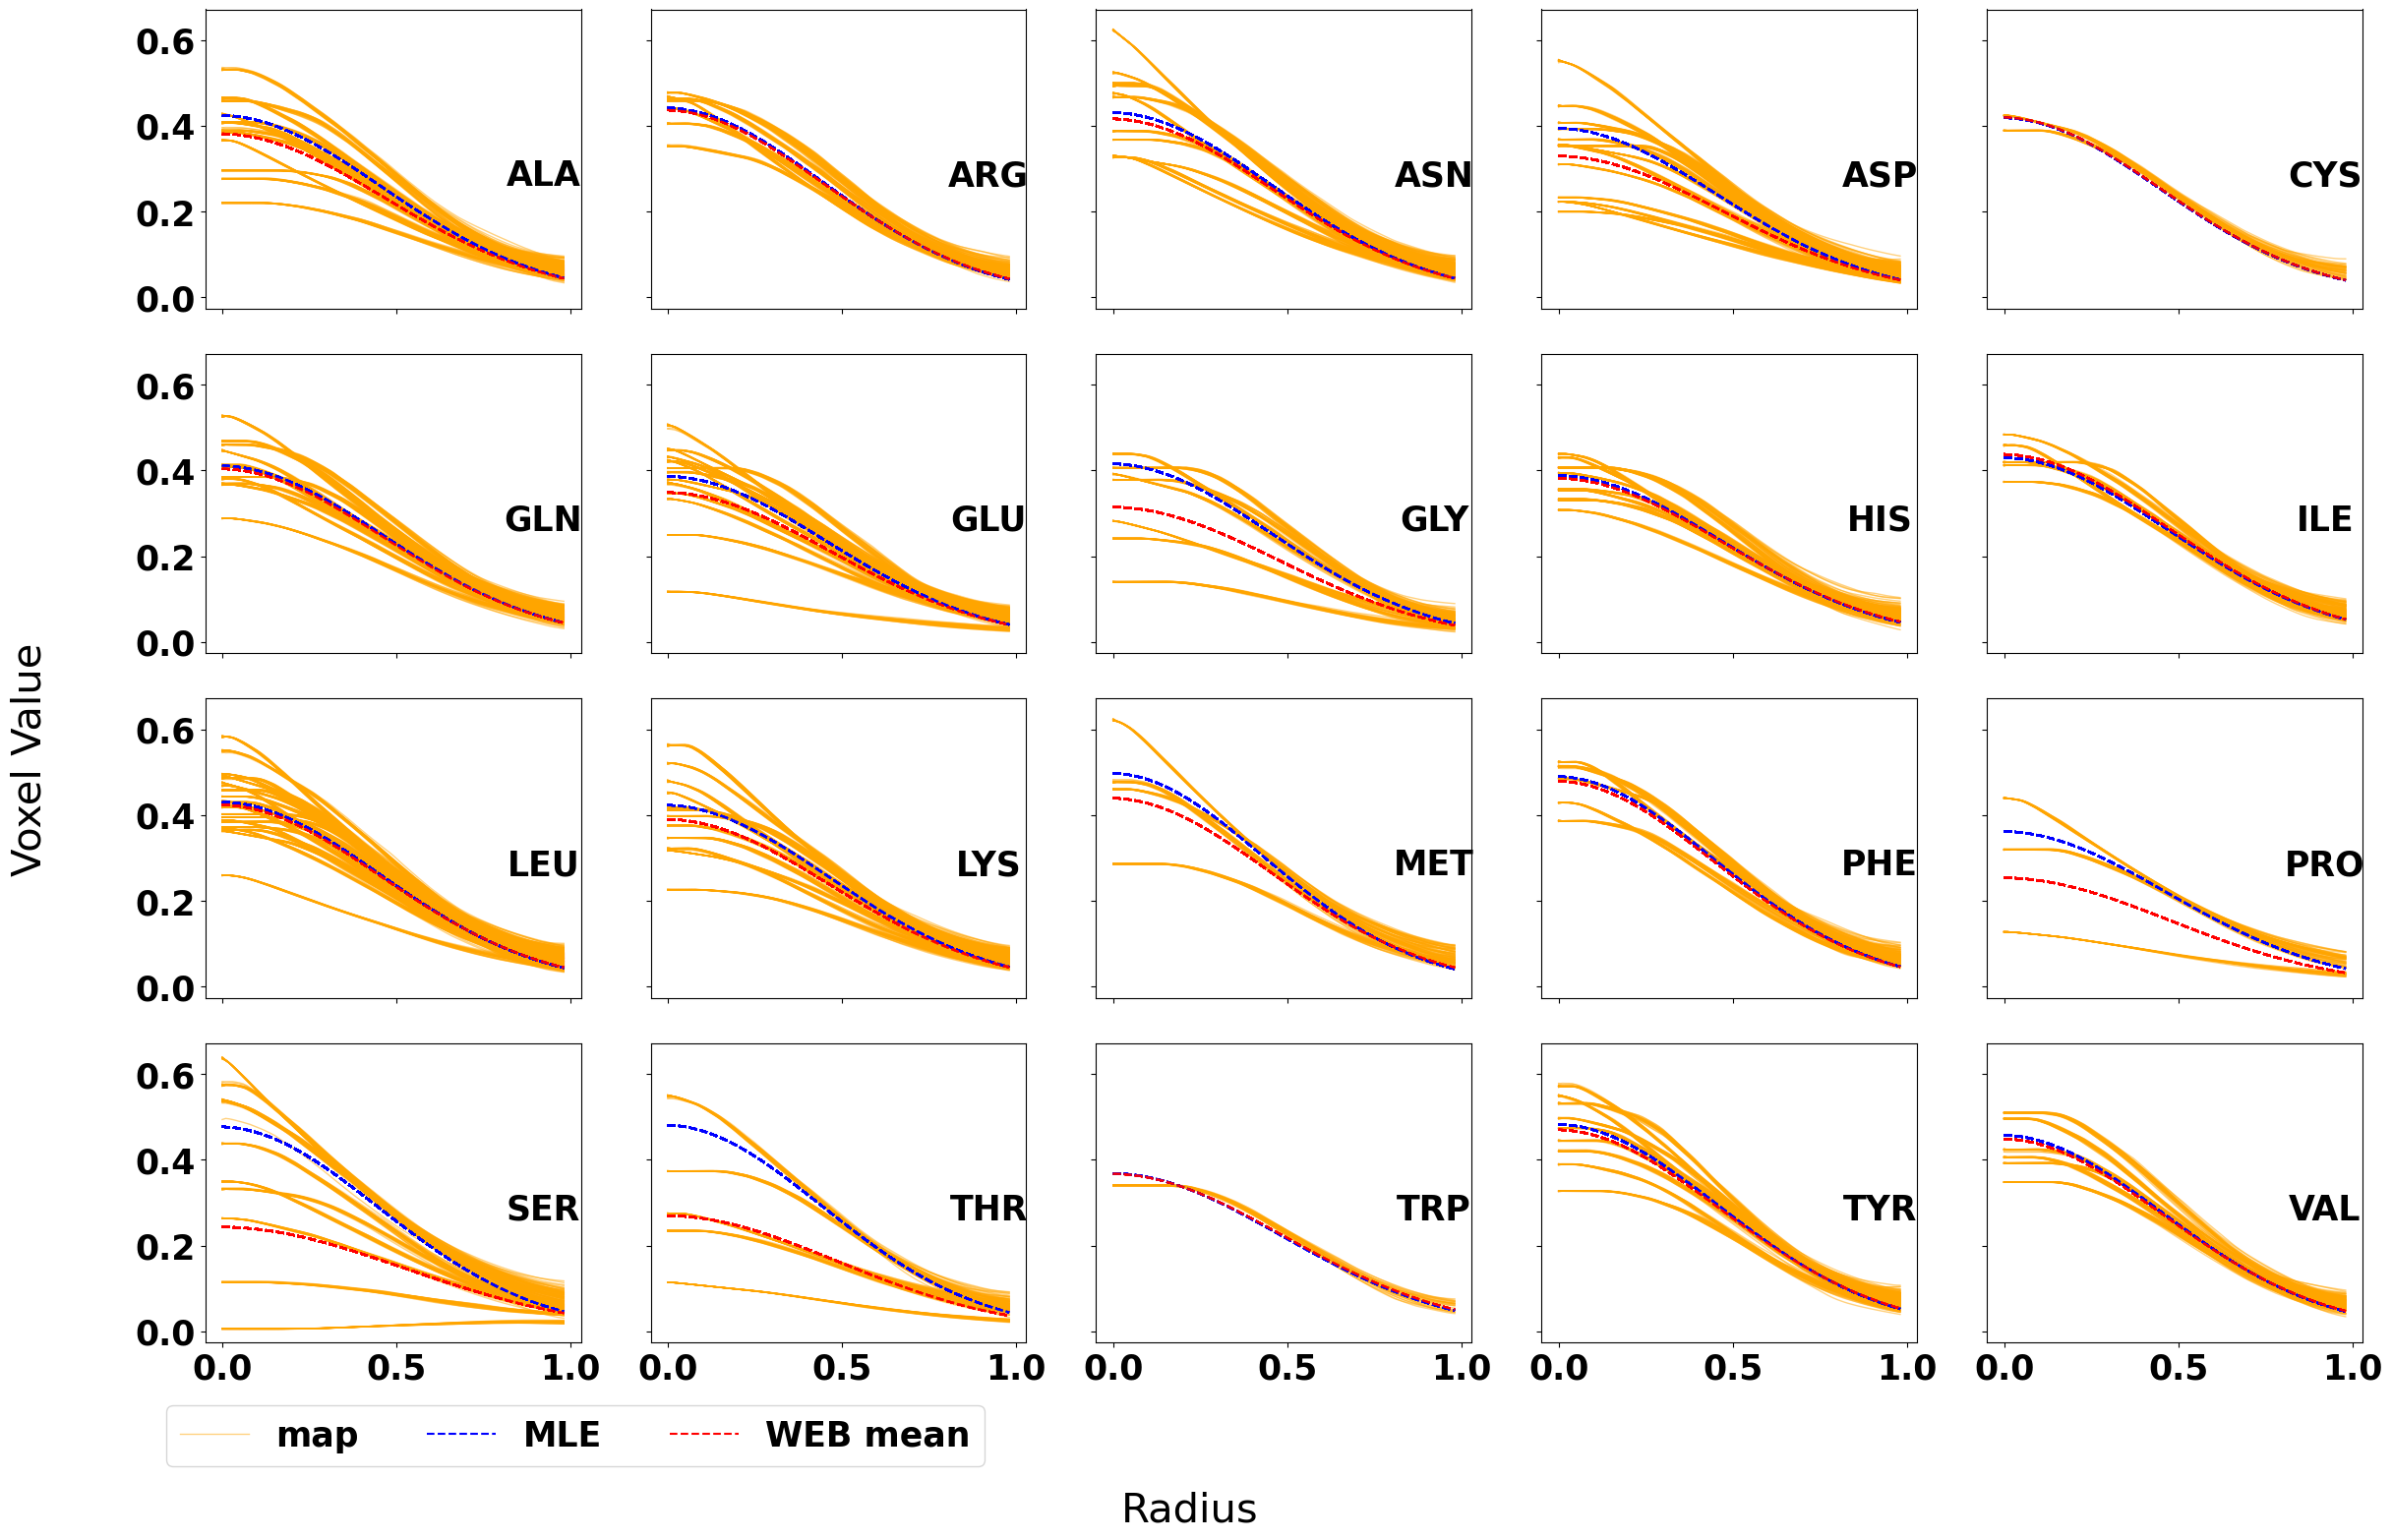

In [6]:
wqeb.plot_data(max_radius=1, gap=0.01, save=True)

In [ ]:
A = [np.diag(weights) for weights in wqeb.weight_matrixs["A"]]
df_A = pd.DataFrame(A).T
df_A.columns = [f"True Beta = {np.round(beta, 2)}" for beta in wqeb.betas["A"]]

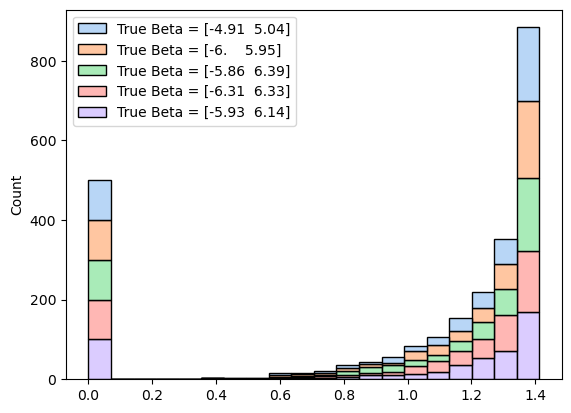

In [ ]:
import seaborn as sns
sns.histplot(data=df_A, stat="count", multiple="stack", kde=False, palette="pastel",
             element="bars", legend=True, bins = 20)
plt.savefig("../figures/weight_matrixs_A")

In [ ]:
B = [np.diag(weights) for weights in wqeb.weight_matrixs["B"]]
df_B = pd.DataFrame(B).T
df_B.columns = [f"True Beta = {np.round(beta, 2)}" for beta in wqeb.betas["B"]]

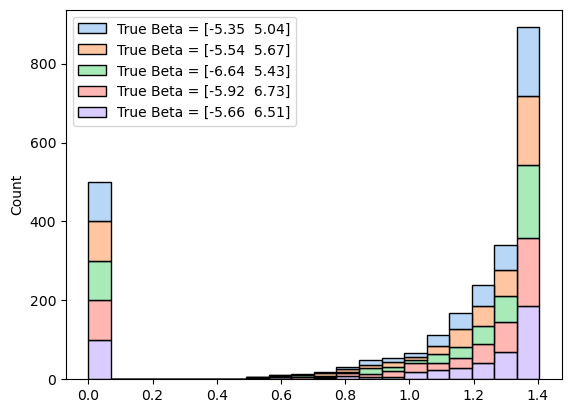

In [ ]:
import seaborn as sns
sns.histplot(data=df_B, stat="count", multiple="stack", kde=False, palette="pastel",
             element="bars", legend=True, bins = 20)
plt.savefig("../figures/weight_matrixs_B")

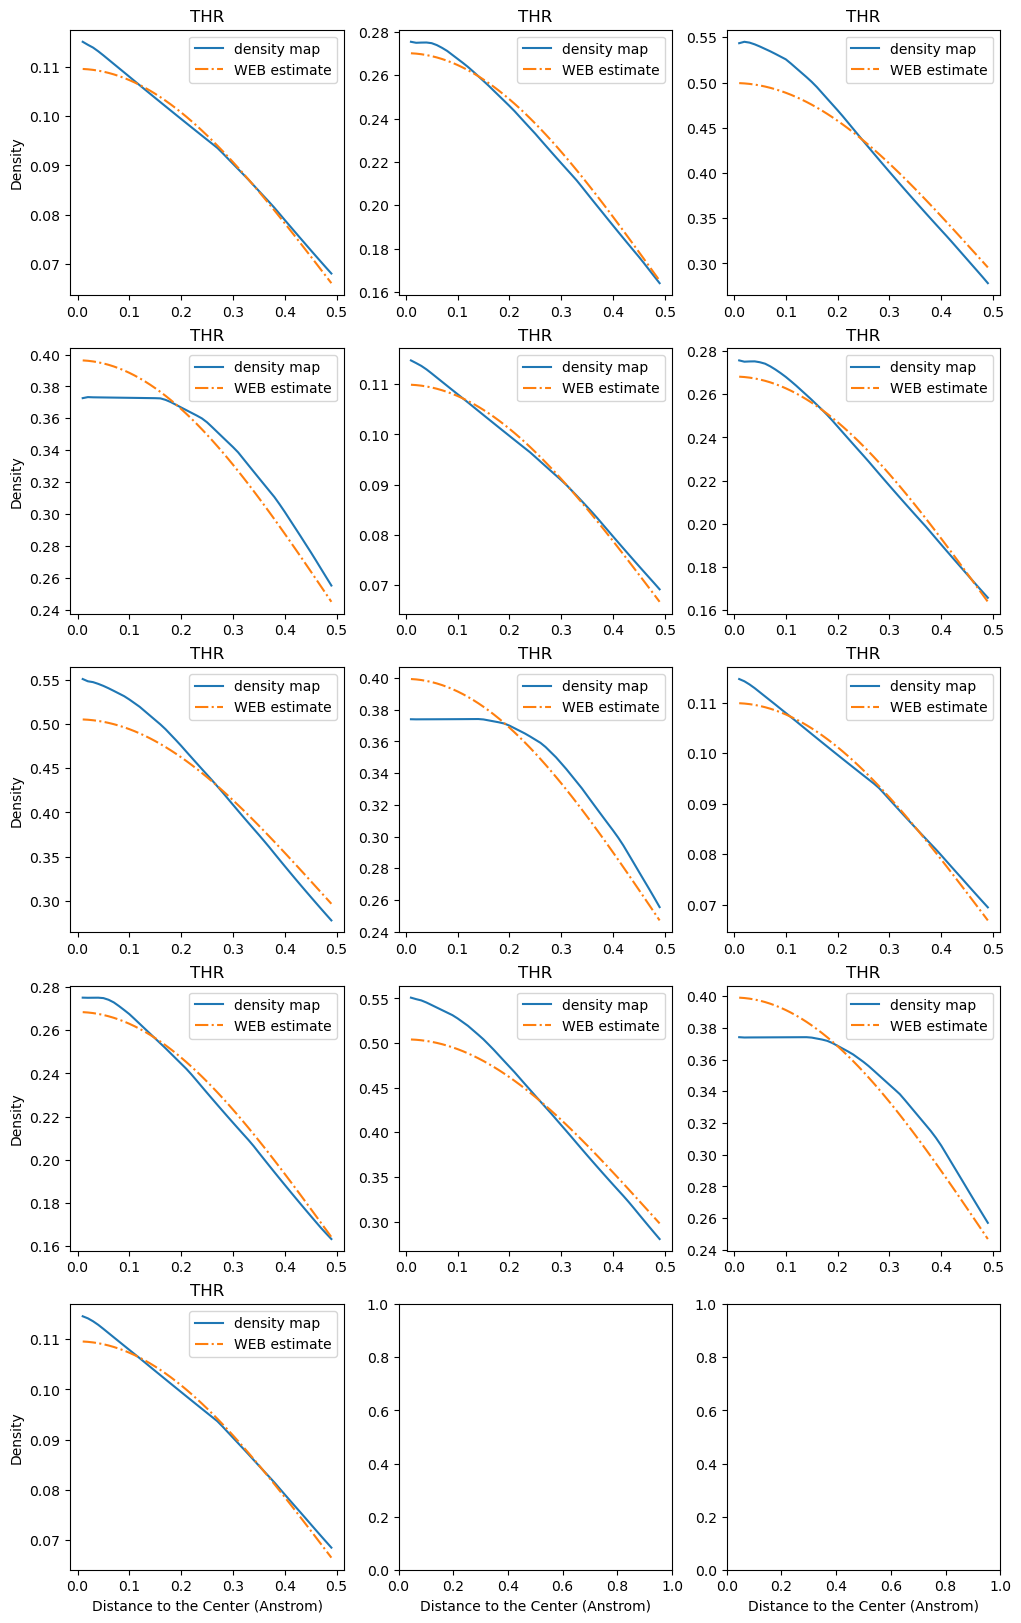

In [ ]:
wqeb.plot_data(max_rad=0.5, amino_acid="THR")

In [ ]:
wqeb.betas_em["SER"]

array([[-5.08919194, -3.30185218],
       [-1.32173519,  4.11898888],
       [-1.05466318,  4.53342354],
       [-0.71610258,  6.29323913],
       [-0.61926832,  4.87115188],
       [-0.64513169,  5.48097793],
       [-0.67640057,  4.8604109 ],
       [-1.00142459,  4.63278871],
       [-2.1433245 ,  2.91007488],
       [-5.07206776, -2.93671399],
       [-1.3323207 ,  4.1319605 ],
       [-1.04401488,  4.58074366],
       [-0.60367595,  4.80365695],
       [-0.63227357,  4.91581785],
       [-0.65875689,  4.82894882],
       [-0.68059605,  4.84495651],
       [-1.00594942,  4.57903772],
       [-2.15538006,  3.21356017],
       [-5.08169156, -2.98409614],
       [-1.33304785,  4.14228108],
       [-1.07024493,  4.24843186],
       [-0.6312188 ,  4.93481908],
       [-0.6163128 ,  5.18831979],
       [-0.65807955,  4.8179204 ],
       [-0.68652421,  4.85445868],
       [-1.01682513,  4.64608568],
       [-2.1755398 ,  2.82559803],
       [-5.07745883, -2.55374332],
       [-1.36205814,

(array([[ 24.,   0.,  48., 168.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  19.,   5.,   0.,   0.,  19.,  29., 156.,   7.,   5.]]),
 array([-5.17909051, -3.83753811, -2.49598571, -1.15443331,  0.18711909,
         1.52867149,  2.87022389,  4.21177629,  5.5533287 ,  6.8948811 ,
         8.2364335 ]),
 <a list of 2 BarContainer objects>)

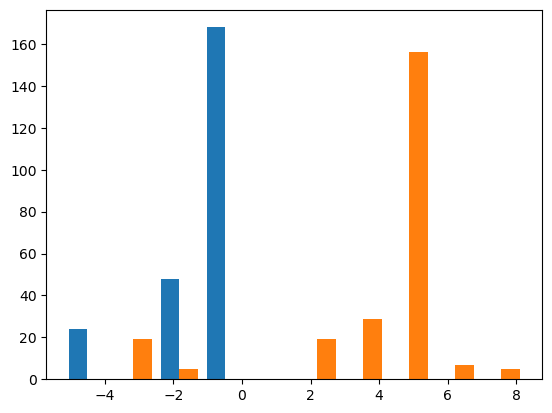

In [ ]:
plt.hist(wqeb.betas_em["SER"])

In [ ]:
wqeb.mus_mle

{'ALA': array([-0.87935299,  4.59410953]),
 'ARG': array([-0.84344561,  4.84463408]),
 'ASN': array([-0.72014312,  4.6550548 ]),
 'ASP': array([-0.9941492 ,  4.20429072]),
 'CYS': array([-0.88433208,  4.69011994]),
 'GLN': array([-0.92733641,  4.49019502]),
 'GLU': array([-0.90978788,  4.5570684 ]),
 'GLY': array([-0.86258705,  4.53200383]),
 'HIS': array([-0.9932477 ,  4.22573101]),
 'ILE': array([-0.84031063,  4.23895862]),
 'LEU': array([-0.81786762,  4.54576607]),
 'LYS': array([-0.85696994,  4.39877484]),
 'MET': array([-0.72395408,  5.02405128]),
 'PHE': array([-0.66816956,  4.65531942]),
 'PRO': array([-1.05815181,  4.31416084]),
 'SER': array([-0.6494596 ,  4.90463239]),
 'THR': array([-1.32856848,  3.76187006]),
 'TRP': array([-1.02199681,  3.79442259]),
 'TYR': array([-0.70586527,  4.47690943]),
 'VAL': array([-0.85377639,  4.46398003])}

In [ ]:
np.where(wqeb.betas_em["SER"][:, 0] < -1)

(array([  0,   1,   2,   7,   8,   9,  10,  11,  16,  17,  18,  19,  20,
         25,  26,  27,  28,  29,  35,  36,  37,  38,  43,  44,  45,  46,
         47,  53,  54,  55,  56,  61,  62,  63,  64,  65,  71,  72,  73,
         74,  79,  80,  81,  82,  83,  88,  89,  90,  91,  92,  97,  98,
         99, 100, 101, 106, 107, 108, 109, 110, 115, 116, 117, 118, 119,
        125, 126, 127, 128, 133, 134, 135, 136, 137, 143, 144, 145, 146,
        151, 152, 153, 154, 155, 160, 161, 162, 163, 164, 169, 170, 171,
        172, 173, 179, 180, 181, 182, 187, 188, 189, 190, 191, 196, 197,
        198, 199, 200, 205, 206, 207, 208, 209, 214, 215]),)

In [ ]:
name = "SER"
sigma = wqeb.sigmas_median[name] 
mean = wqeb.mus_mle[name]
betas = wqeb.betas_em[name]

In [ ]:
statistic_distances = []
for i in range(len(betas)):
    statistic_distances.append((betas - mean)[i].T @ np.linalg.inv(sigma_matrix) @ (betas - mean)[i] / len(betas))

In [ ]:
from scipy.stats import multivariate_normal, chi2
outliers = {}
statistic_distances = {}
_, margin = chi2.interval(0.95, 99)
# margin = 500
for name in wqeb.betas_em:
    outliers[name] = []
    statistic_distances[name] = []
    sigmas = wqeb.sigmas_median[name] 
    mean = wqeb.mus_mle[name]
    betas = wqeb.betas_em[name]
    lambdas = wqeb.lambdas[name]
    weight_matrixs = wqeb.weight_matrixs[name]
    datas = wqeb.densities_data[name]
    X = np.unique(wqeb.Xs_tilde[name][0], axis=0)
    # sigma_matrix = np.sum([lambdas[i] * (betas - mean)[i].reshape(-1, 1) @ (betas - mean)[i].reshape(-1, 1).T for i in range(len(betas))], axis=0) / np.sum(lambdas) 
    # sigma_matrix = np.sum([lambdas[i] * (X @ (betas - mean)[i].reshape(-1, 1)) @ (X @ (betas - mean)[i].reshape(-1, 1)).T for i in range(len(betas))], axis=0) / np.sum(lambdas) 
    for i in range(len(betas)):
        sigma_matrix = sigmas[i] * np.eye(len(X))
        # sigma_matrix = sigmas[i] * weight_matrixs[i]
        
        # statistic_distance = (betas - mean)[i].T @ np.linalg.inv(sigma_matrix) @ (betas - mean)[i] 
        Z = (X @ (betas - mean)[i]).reshape(-1, 1)
        # Z = (datas[i] - np.exp(X @ mean)).reshape(-1, 1)
        statistic_distance = (Z.T @ Z).flatten()
        # statistic_distance = (betas[i] - mean).T @np.linalg.inv(sigma[i] * np.eye(2)) @ (betas[i] - mean)
        statistic_distances[name].append(np.round(statistic_distance, 2))
        if statistic_distance > margin:
            outliers[name].append(i)

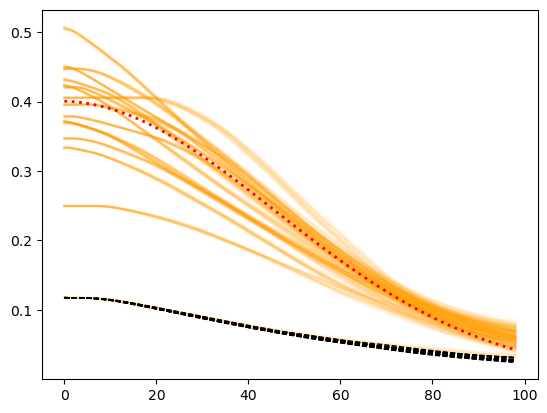

In [ ]:
name = "GLU"
outliers[name]
for idx, density in enumerate(wqeb.densities_data[name]):
    if idx in outliers[name]:
        plt.plot(density, color="black", linewidth=1, linestyle="--")
    else:
        plt.plot(density, color="orange", alpha=0.05)
        
plt.plot(wqeb.densities_mle[name], color="red", linewidth=2, linestyle=":")

In [ ]:
from scipy.stats import multivariate_normal, chi2
outliers = {}
statistic_distances = {}
# _, margin = chi2.interval(0.95, 2)
margin = 5
for name in wqeb.betas_em:
    outliers[name] = []
    statistic_distances[name] = []
    sigmas = wqeb.sigmas_median[name] 
    mean = wqeb.mus_mle[name]
    betas = wqeb.betas_em[name]
    lambdas = wqeb.lambdas[name]
    weight_matrixs = wqeb.weight_matrixs[name]
    datas_density = wqeb.densities_data[name]
    estimated_density = wqeb.densities_estimated[name]
    mle_density = wqeb.densities_mle[name]
    sigma_matrix = np.sum([lambdas[i] * (betas - mean)[i].reshape(-1, 1) @ (betas - mean)[i].reshape(-1, 1).T for i in range(len(betas))], axis=0) / np.sum(lambdas) 
    for i in range(len(betas)):
        # sigma_matrix = wqeb.sigmas_median[name][i] * np.eye(len(mle_density))
        # sigma_matrix = sigmas[i] * weight_matrixs[i]
        
        statistic_distance = (betas - mean)[i].T @ (betas - mean)[i] 
        # Z = (mle_density - datas_density[i]).reshape(-1, 1)
        # Z = (datas[i] - np.exp(X @ mean)).reshape(-1, 1)
        # statistic_distance = (Z.T @ Z).flatten()
        # statistic_distance = (betas[i] - mean).T @np.linalg.inv(sigma[i] * np.eye(2)) @ (betas[i] - mean)
        statistic_distances[name].append(np.round(statistic_distance, 2))
        if statistic_distance > margin:
            outliers[name].append(i)

In [ ]:
statistic_distances["LEU"][outliers["LEU"][0]]

7.26

In [ ]:
name = "LEU"
outliers[name]
for idx, density in enumerate(wqeb.densities_data[name]):
    if idx in outliers[name]:
        plt.plot(density, color="black", linewidth=1, linestyle="--")
    else:
        plt.plot(density, color="orange", alpha=0.05)
        
plt.plot(wqeb.densities_mle[name], color="red", linewidth=2, linestyle=":")

In [ ]:
wqeb.betas_em["LEU"][outliers["LEU"]][0]

array([-0.71409269,  7.37403768])

In [ ]:
wqeb.betas_em["LEU"]

array([[-0.78153397,  4.59520102],
       [-0.75525353,  4.5582439 ],
       [-0.65301464,  4.64898867],
       ...,
       [-0.74007596,  4.55698579],
       [-0.74055978,  4.71315311],
       [-0.71811606,  4.54098962]])

In [ ]:
from scipy.stats import multivariate_normal, chi2
outliers = {}
statistic_distances = {}
_, margin = chi2.interval(0.95, 1)
# margin = 1
for name in wqeb.betas_weighted:
    outliers[name] = []
    statistic_distances[name] = []
    sigmas = wqeb.sigmas_median[name] 
    mean = wqeb.mus_mle[name]
    betas = wqeb.betas_weighted[name]
    lambdas = wqeb.lambdas[name]
    weight_matrixs = wqeb.weight_matrixs[name]
    datas_density = wqeb.densities_data[name]
    estimated_density = wqeb.densities_betas_weighted[name]
    mle_density = wqeb.densities_mle[name]
    # sigma_matrix = np.sum([lambdas[i] * (betas - mean)[i].reshape(-1, 1) @ (betas - mean)[i].reshape(-1, 1).T for i in range(len(betas))], axis=0) / np.sum(lambdas) 
    sigma_matrix = np.sum([(betas - mean)[i][0] ** 2 for i in range(len(betas))]) / (len(betas) - 1)
    for i in range(len(betas)):
        # sigma_matrix = wqeb.sigmas_median[name][i] * np.eye(len(mle_density))
        # sigma_matrix = sigmas[i] * weight_matrixs[i]
        
        statistic_distance = (betas - mean)[i][0] ** 2 / sigma_matrix
        # Z = (mle_density - datas_density[i]).reshape(-1, 1)
        # Z = (datas[i] - np.exp(X @ mean)).reshape(-1, 1)
        # statistic_distance = (Z.T @ Z).flatten()
        # statistic_distance = (betas[i] - mean).T @np.linalg.inv(sigma[i] * np.eye(2)) @ (betas[i] - mean)
        statistic_distances[name].append(np.round(statistic_distance, 2))
        if statistic_distance > margin:
            outliers[name].append(i)

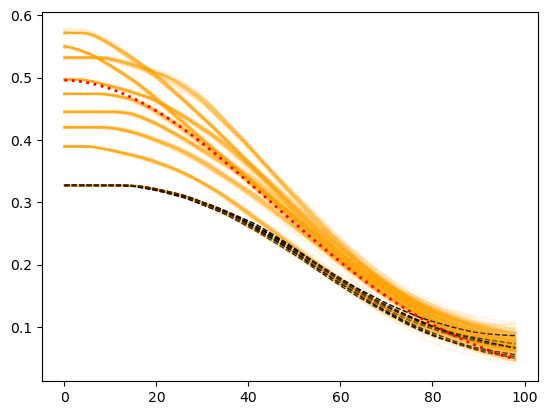

In [ ]:
name = "TYR"
outliers[name]
for idx, density in enumerate(wqeb.densities_data[name]):
    if idx in outliers[name]:
        plt.plot(density, color="black", linewidth=1, linestyle="--")
    else:
        plt.plot(density, color="orange", alpha=0.1)
        
plt.plot(wqeb.densities_mle[name], color="red", linewidth=2, linestyle=":")

In [ ]:
densities_outliers = {}
for name in wqeb.densities_data:
    densities_outliers[name] =wqeb.densities_data[name][outliers[name]]

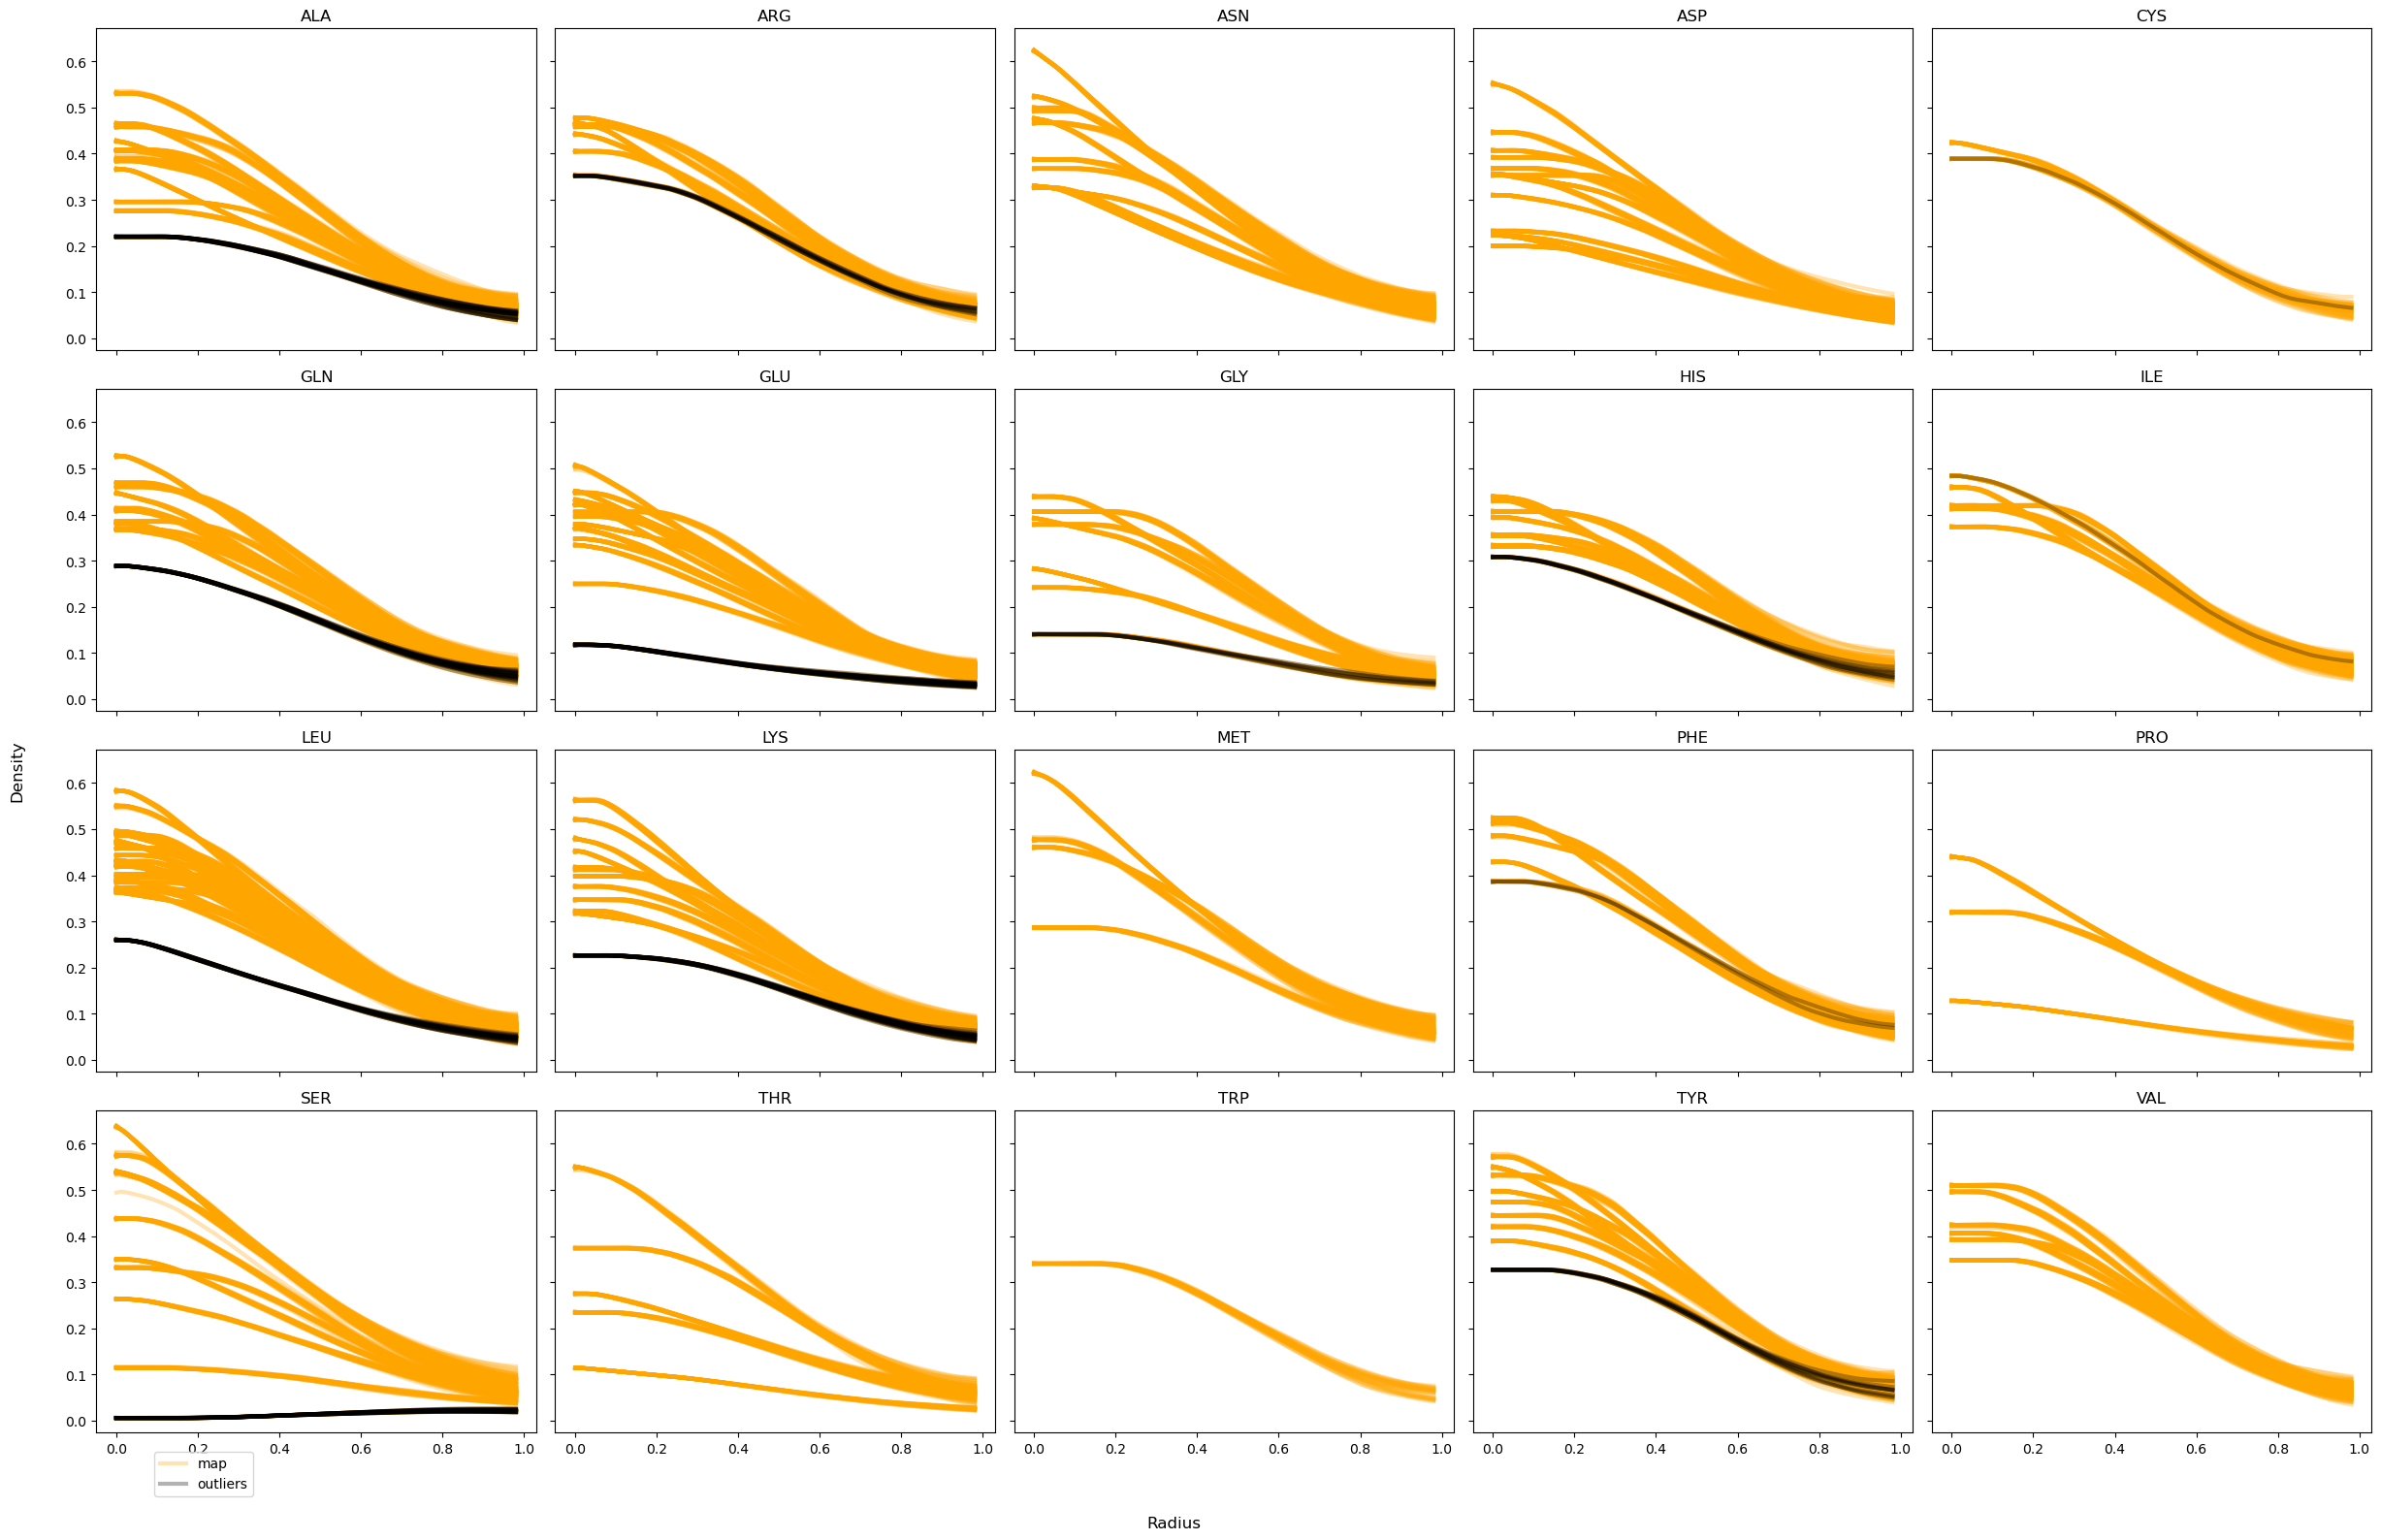

In [ ]:

max_radius = 1
gap = 0.01
subplots_num = len(densities_outliers)
nums = int(subplots_num / 5) + 1 if subplots_num % 5 != 0 else int(subplots_num / 5)
fig, axes = plt.subplots(nums, 5, figsize=(25, nums * 4), sharex=True, sharey=True, squeeze=False)
x = np.arange(0, max_radius - gap, gap)
length = len(x)

for times, name in enumerate(densities_outliers): 
    i = times // 5
    j = times % 5
    for density in wqeb.densities_data[name]:
        axes[i][j].plot(x, density[:length], linewidth=3, alpha=0.3, c="orange", label="map")
    for density_outliers in densities_outliers[name]:
        axes[i][j].plot(x, density_outliers[:length], linewidth=3, alpha=0.3, c="black", label="outliers")
    axes[i][j].set_title(name)

labels_handles = {
label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

fig.legend(
labels_handles.values(),
labels_handles.keys(),
loc = "upper center",
bbox_to_anchor = (0.1, 0.065),
bbox_transform = plt.gcf().transFigure,
)
fig.supxlabel('Radius')
fig.supylabel('Density')
plt.tight_layout()
fig.tight_layout(rect=(0.025, 0.03, 1, 1))
fig.savefig("../figures/outliers_beta0.png")

In [ ]:
from scipy.stats import multivariate_normal, chi2
outliers = {}
statistic_distances = {}
_, margin = chi2.interval(0.95, 1)
# margin = 1
for name in wqeb.betas_weighted:
    outliers[name] = []
    statistic_distances[name] = []
    sigmas = wqeb.sigmas_median[name] 
    mean = wqeb.mus_mle[name]
    betas = wqeb.betas_weighted[name]
    lambdas = wqeb.lambdas[name]
    weight_matrixs = wqeb.weight_matrixs[name]
    datas_density = wqeb.densities_data[name]
    estimated_density = wqeb.densities_betas_weighted[name]
    mle_density = wqeb.densities_mle[name]
    # sigma_matrix = np.sum([lambdas[i] * (betas - mean)[i].reshape(-1, 1) @ (betas - mean)[i].reshape(-1, 1).T for i in range(len(betas))], axis=0) / np.sum(lambdas) 
    sigma_matrix = np.sum([(betas - mean)[i][1] ** 2 for i in range(len(betas))]) / (len(betas) - 1)
    for i in range(len(betas)):
        # sigma_matrix = wqeb.sigmas_median[name][i] * np.eye(len(mle_density))
        # sigma_matrix = sigmas[i] * weight_matrixs[i]
        
        statistic_distance = (betas - mean)[i][1] ** 2 / sigma_matrix
        # Z = (mle_density - datas_density[i]).reshape(-1, 1)
        # Z = (datas[i] - np.exp(X @ mean)).reshape(-1, 1)
        # statistic_distance = (Z.T @ Z).flatten() 
        # statistic_distance = (betas[i] - mean).T @np.linalg.inv(sigma[i] * np.eye(2)) @ (betas[i] - mean)
        statistic_distances[name].append(np.round(statistic_distance, 2))
        if statistic_distance > margin:
            outliers[name].append(i)

In [ ]:
densities_outliers = {}
for name in wqeb.densities_data:
    densities_outliers[name] =wqeb.densities_data[name][outliers[name]]

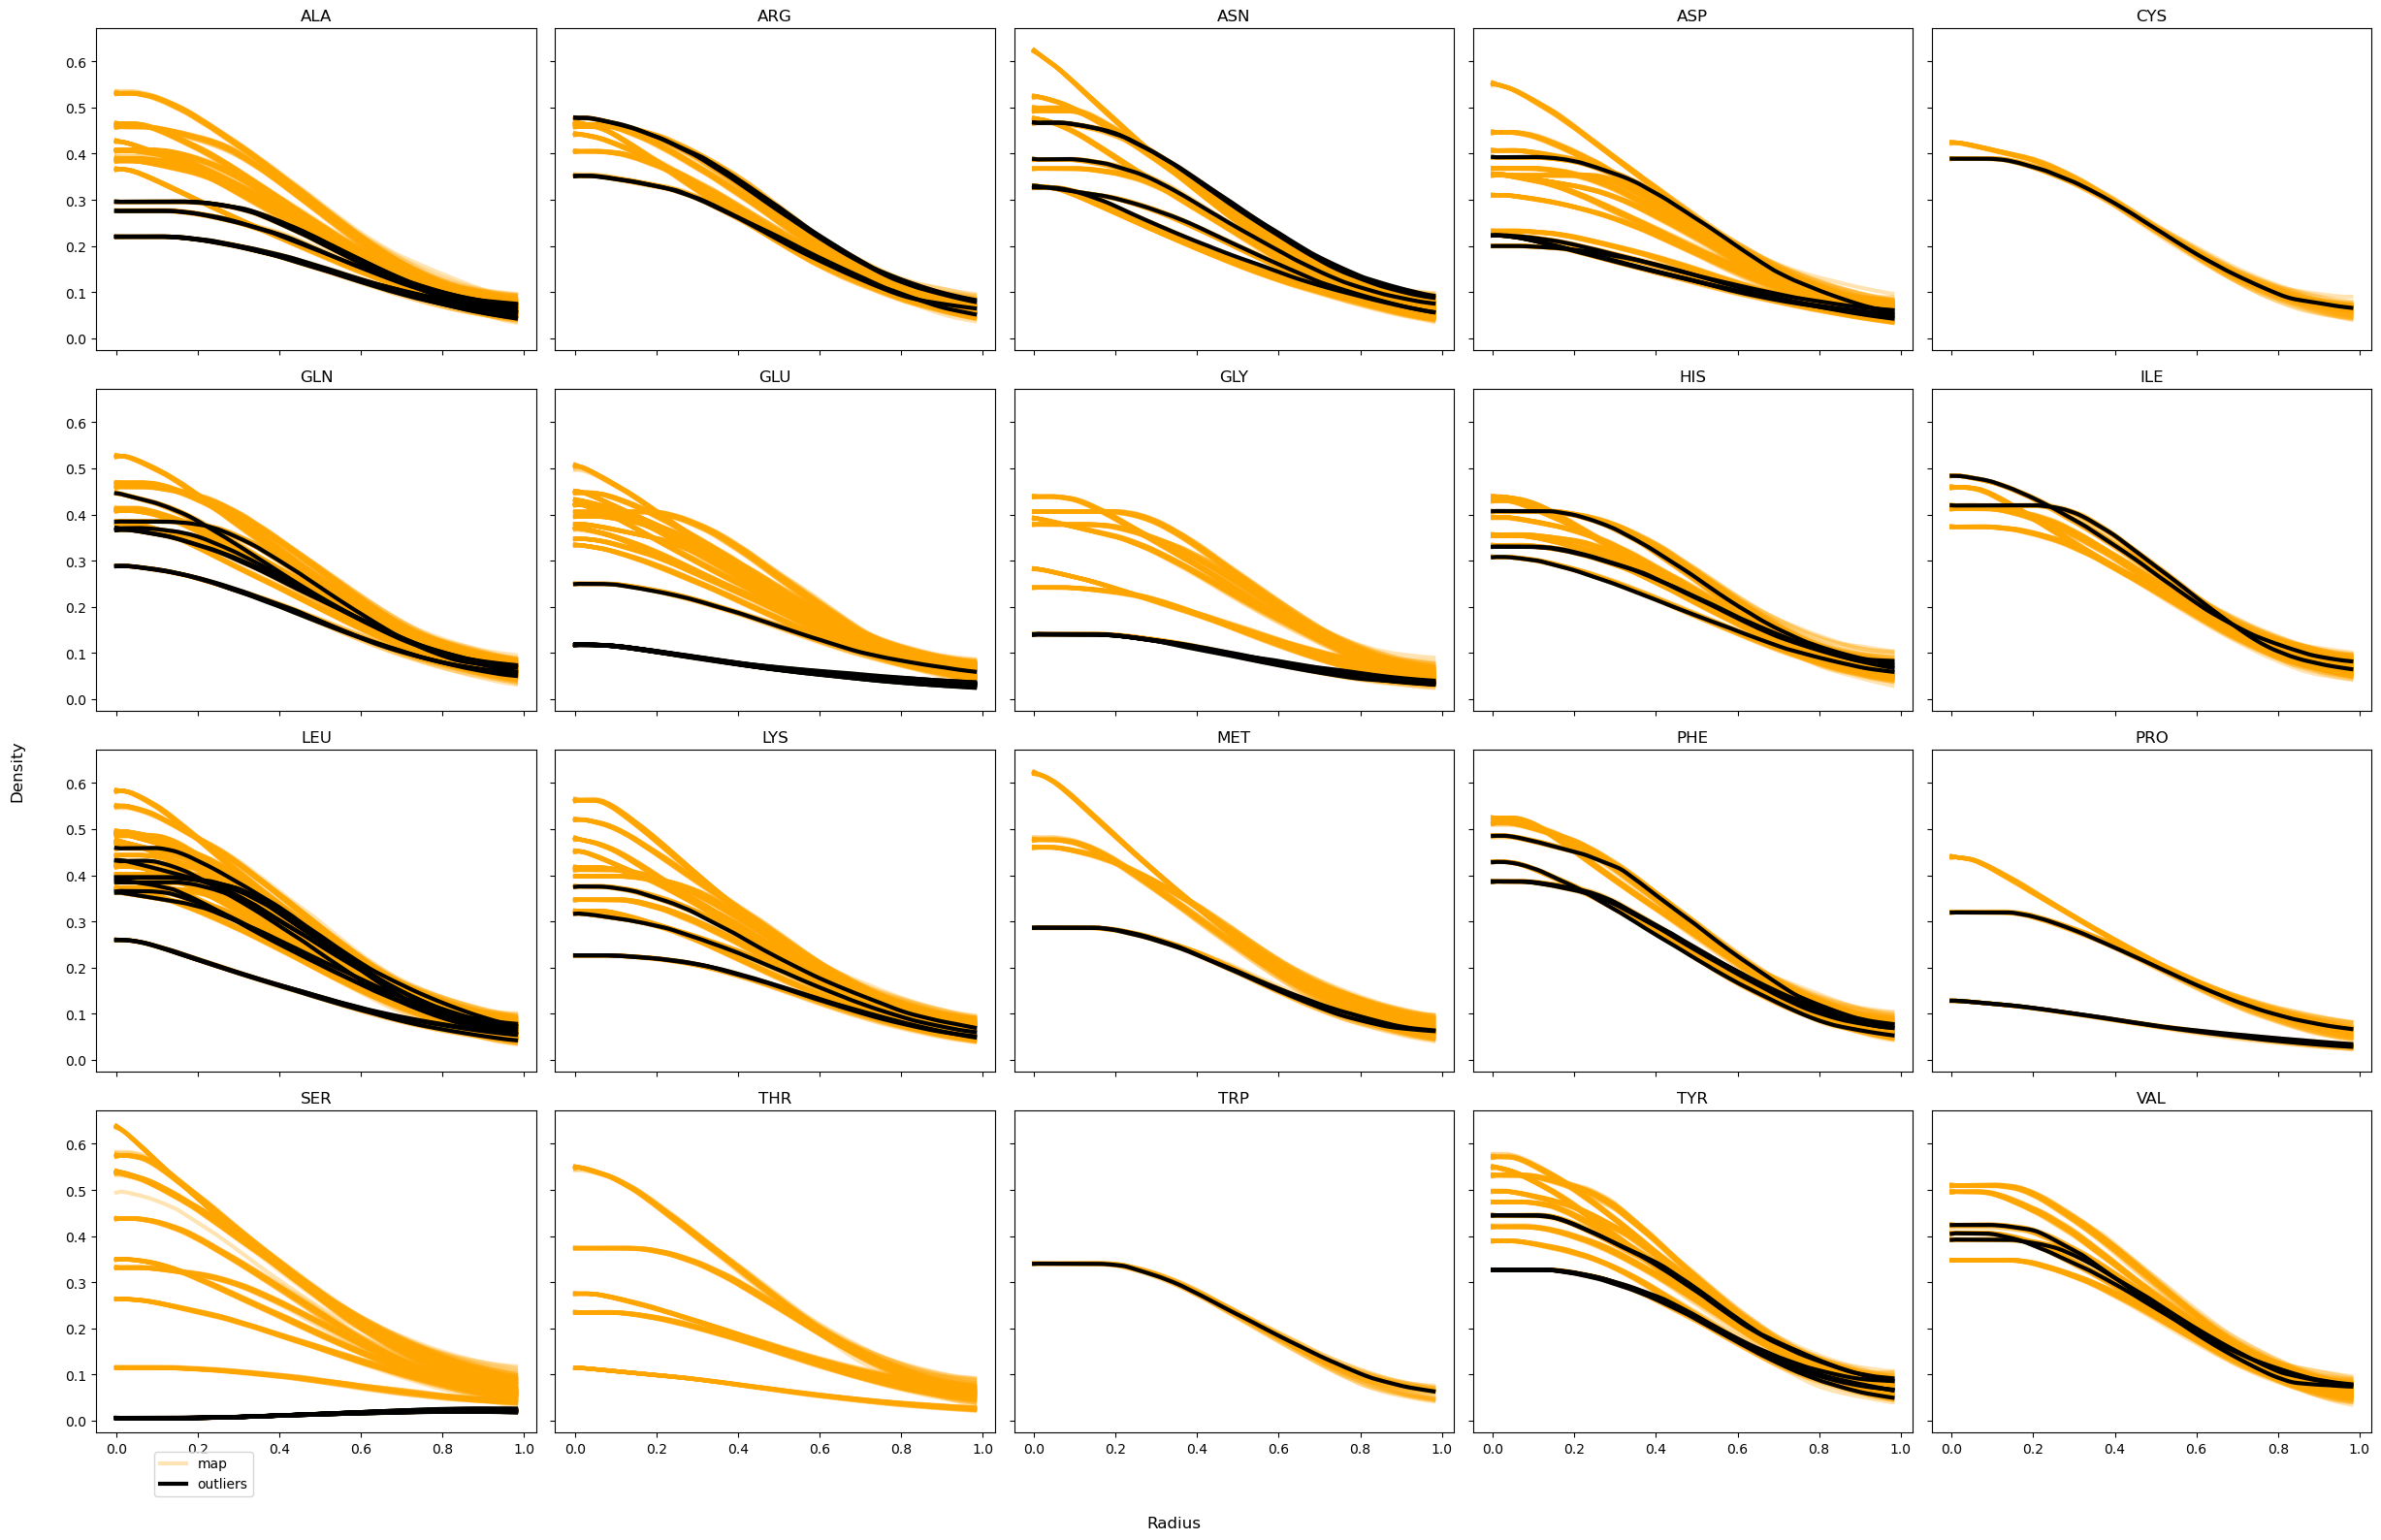

In [ ]:

max_radius = 1
gap = 0.01
subplots_num = len(densities_outliers)
nums = int(subplots_num / 5) + 1 if subplots_num % 5 != 0 else int(subplots_num / 5)
fig, axes = plt.subplots(nums, 5, figsize=(25, nums * 4), sharex=True, sharey=True, squeeze=False)
x = np.arange(0, max_radius - gap, gap)
length = len(x)

for times, name in enumerate(densities_outliers): 
    i = times // 5
    j = times % 5
    for density in wqeb.densities_data[name]:
        axes[i][j].plot(x, density[:length], linewidth=3, alpha=0.3, c="orange", label="map")
    for density_outliers in densities_outliers[name]:
        axes[i][j].plot(x, density_outliers[:length], linewidth=3, alpha=1, c="black", label="outliers")
    axes[i][j].set_title(name)

labels_handles = {
label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

fig.legend(
labels_handles.values(),
labels_handles.keys(),
loc = "upper center",
bbox_to_anchor = (0.1, 0.065),
bbox_transform = plt.gcf().transFigure,
)
fig.supxlabel('Radius')
fig.supylabel('Density')
plt.tight_layout()
fig.tight_layout(rect=(0.025, 0.03, 1, 1))
fig.savefig("../figures/outliers_beta1.png")

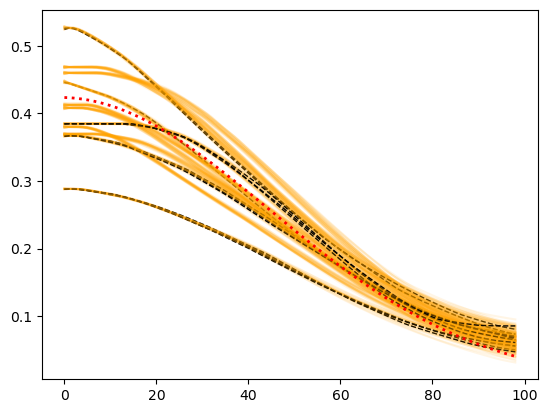

In [ ]:
name = "GLN"
outliers[name]
for idx, density in enumerate(wqeb.densities_data[name]):
    if idx in outliers[name]:
        plt.plot(density, color="black", linewidth=1, linestyle="--")
    else:
        plt.plot(density, color="orange", alpha=0.1)
        
plt.plot(wqeb.densities_mle[name], color="red", linewidth=2, linestyle=":")

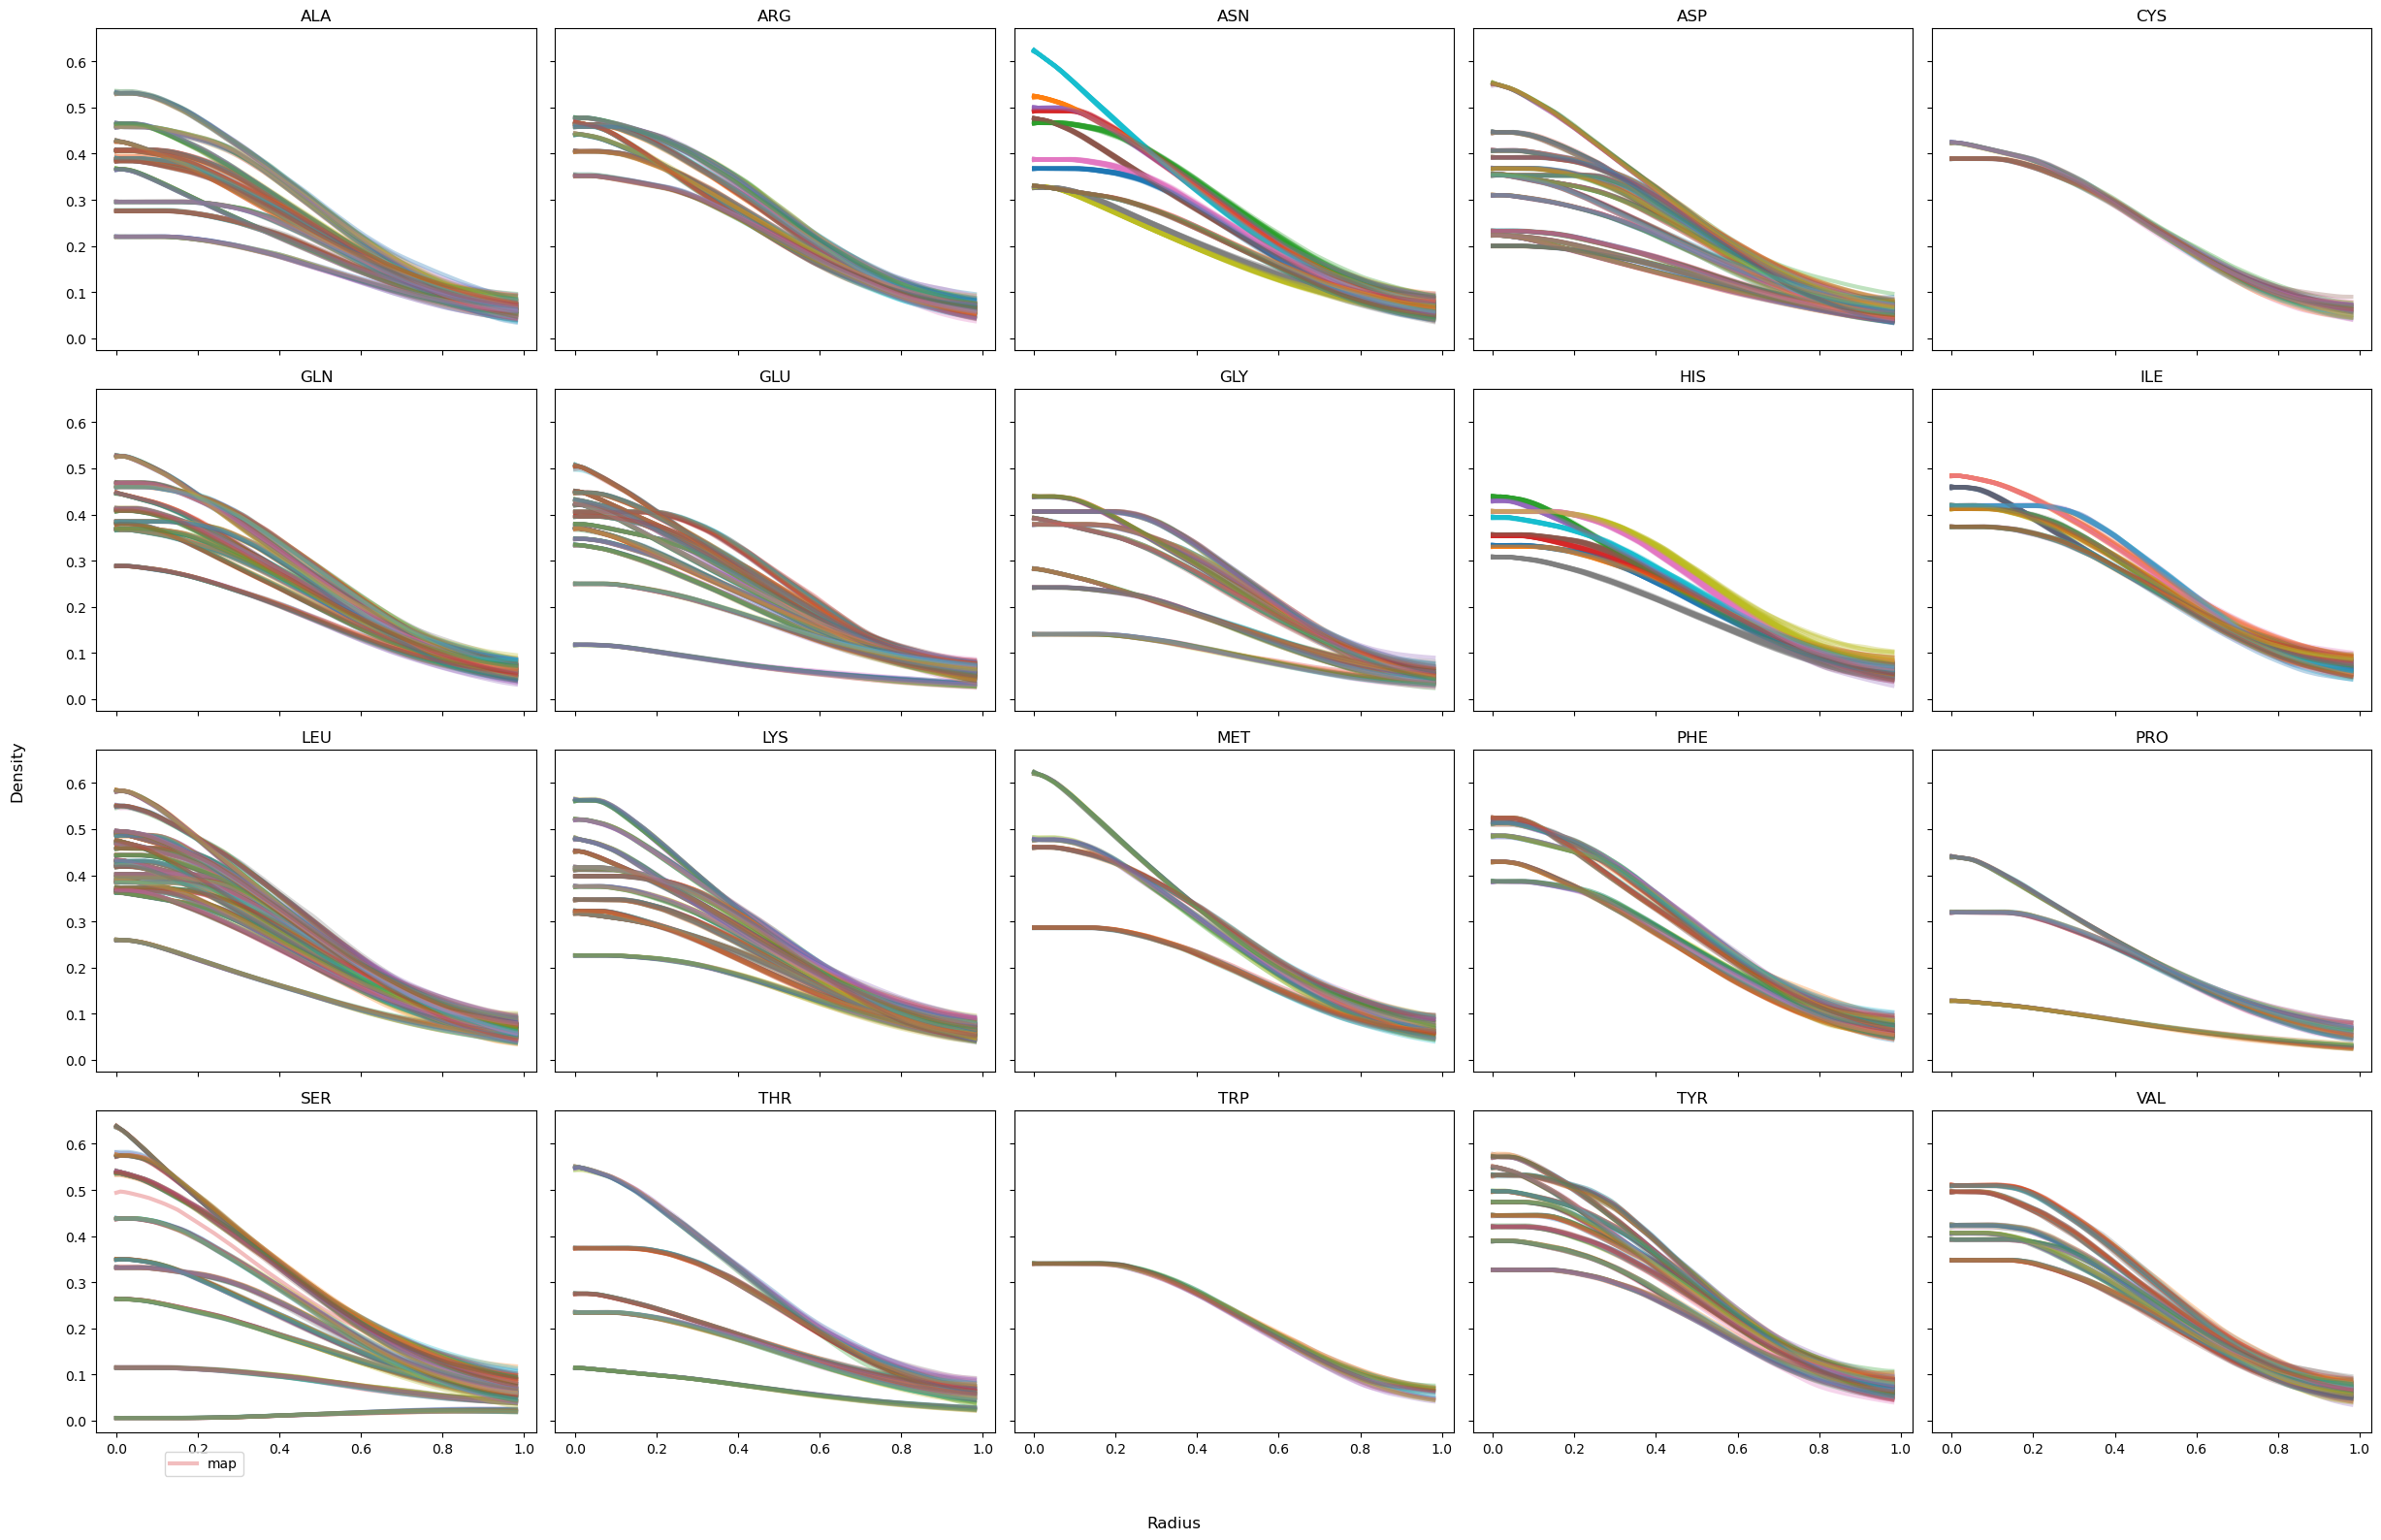

In [ ]:

max_radius = 1
gap = 0.01
subplots_num = len(densities_outliers)
nums = int(subplots_num / 5) + 1 if subplots_num % 5 != 0 else int(subplots_num / 5)
fig, axes = plt.subplots(nums, 5, figsize=(25, nums * 4), sharex=True, sharey=True, squeeze=False)
x = np.arange(0, max_radius - gap, gap)
length = len(x)

for times, name in enumerate(densities_outliers): 
    i = times // 5
    j = times % 5
    for density in wqeb.densities_data[name]:
        axes[i][j].plot(x, density[:length], linewidth=3, alpha=0.3, label="map")
    axes[i][j].set_title(name)

labels_handles = {
label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

fig.legend(
labels_handles.values(),
labels_handles.keys(),
loc = "upper center",
bbox_to_anchor = (0.1, 0.065),
bbox_transform = plt.gcf().transFigure,
)
fig.supxlabel('Radius')
fig.supylabel('Density')
plt.tight_layout()
fig.tight_layout(rect=(0.025, 0.03, 1, 1))
fig.savefig("../figures/density_maps.png")

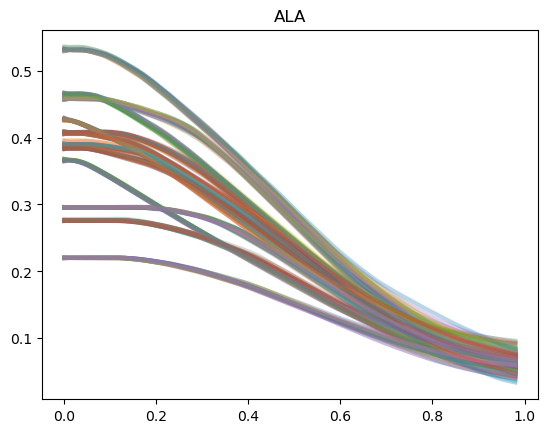

In [ ]:
name = "ALA"
for density in wqeb.densities_data[name]:
    plt.plot(x, density[:length], linewidth=3, alpha=0.3)
plt.title(name)
plt.savefig(f"../figures/density_map_{name}.png")

In [ ]:
wqeb.betas_em["GLN"][outliers["GLN"]][0]

array([-0.78338825,  6.66816507])

In [ ]:
wqeb.betas_em["GLN"]

array([[-1.0139838 ,  4.52173456],
       [-0.89704547,  4.50200053],
       [-1.21484996,  4.47525739],
       [-0.783088  ,  4.53715697],
       [-0.91081542,  3.78602292],
       [-0.75890519,  4.5660079 ],
       [-0.74092094,  4.44075329],
       [-0.89534255,  4.48324699],
       [-0.97058491,  4.48333729],
       [-0.95009936,  4.48904999],
       [-0.92728206,  4.48521547],
       [-0.99751532,  4.50882164],
       [-0.88413036,  4.50732935],
       [-1.21980794,  4.43444765],
       [-0.74677551,  4.42940086],
       [-0.87961197,  4.46826182],
       [-0.7401542 ,  4.50813116],
       [-0.72200832,  4.39223484],
       [-0.89389683,  4.48675903],
       [-0.96446178,  4.47903889],
       [-0.96423904,  4.4992755 ],
       [-0.94217111,  4.48662708],
       [-0.99690953,  4.49000174],
       [-0.78338825,  6.66816507],
       [-1.26859847,  3.57192797],
       [-0.75295536,  4.43079224],
       [-0.88841495,  4.47972779],
       [-0.75295603,  4.56471804],
       [-0.74187096,

In [ ]:
wqeb.densities_estimated["GLN"][0]

array([0.36268888, 0.36244297, 0.36203348, 0.36146098, 0.36072623,
       0.35983024, 0.3587742 , 0.35755955, 0.35618792, 0.35466114,
       0.35298127, 0.35115053, 0.34917137, 0.3470464 , 0.34477842,
       0.34237043, 0.33982555, 0.33714711, 0.33433857, 0.33140354,
       0.32834577, 0.32516915, 0.32187768, 0.31847549, 0.31496681,
       0.31135597, 0.30764738, 0.30384554, 0.29995502, 0.29598045,
       0.29192652, 0.28779795, 0.2835995 , 0.27933596, 0.27501214,
       0.27063284, 0.26620289, 0.26172707, 0.25721018, 0.25265697,
       0.24807216, 0.24346045, 0.23882644, 0.23417474, 0.22950983,
       0.22483616, 0.22015809, 0.2154799 , 0.21080578, 0.20613982,
       0.201486  , 0.19684822, 0.19223025, 0.18763575, 0.18306827,
       0.17853122, 0.17402791, 0.16956151, 0.16513504, 0.16075143,
       0.15641344, 0.15212371, 0.14788475, 0.14369891, 0.13956843,
       0.1354954 , 0.13148176, 0.12752934, 0.12363981, 0.11981472,
       0.11605547, 0.11236336, 0.10873952, 0.10518498, 0.10170

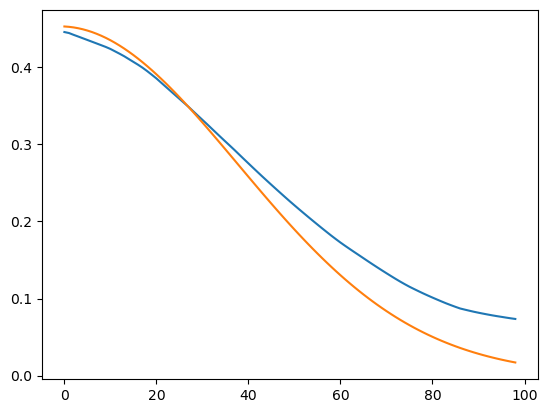

In [ ]:
name = "GLN"
plt.plot(wqeb.densities_data[name][outliers[name][0]])
plt.plot(wqeb.densities_estimated[name][outliers[name][0]])

In [ ]:
# chosen_densities = wqeb.densities_data[name][outliers[name]]
# chosen_estimated_densities = dm[name][outliers[name]]
# chosen_num = int(len(chosen_estimated_densities) / 5)
# fig, axes = plt.subplots(chosen_num + 1, 5, figsize=(20, chosen_num * 5), sharex=True, sharey=True,  squeeze=False)
# for times, elements in enumerate(zip(chosen_densities, chosen_estimated_densities)):
#     chosen_density, chosen_estimated_density = elements
#     i = times // 5
#     j = times % 5
#     axes[i][j].plot(chosen_density)
#     axes[i][j].plot(chosen_estimated_density)

In [ ]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# i = 0
# for name, outlier_all in outliers.items():
#     for outlier in outlier_all:
#         axes[i].plot(wqeb.weighted_estimated_radius_density[name][outlier], "-.", label="WEB estimate")
#         axes[i].plot(wqeb.radius_density[name][outlier], label="density map")
#         axes[i].text(i*1.2 + 0.3, 0.5, f'Statistic Distances: \n{statistic_distances[name][outlier]} >{np.round(margin, 2)}', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)
#         axes[i].title.set_text(name)
#         axes[i].legend()
#         i += 1
# plt.show()

In [ ]:
wqeb.weighted_estimated_radius_density[name]

4.692166657053904

In [ ]:
qscores_all = {}
for name in wqeb.densities_data:
    qscores = []
    for data_density, estimated_density in zip(wqeb.densities_data[name], dm[name]):
        data_density = np.array(data_density)
        estimated_density = np.array(estimated_density)
        numerator = np.dot(data_density - data_density.mean(), estimated_density - estimated_density.mean())
        denominator = np.sqrt(sum((data_density - data_density.mean())**2)) * np.sqrt(sum((estimated_density - estimated_density.mean())**2))
        qscores.append(numerator / denominator)
    qscores_all[name] = qscores

In [ ]:
# for name in qscores_all:
#     result = pd.DataFrame(qscores_all[name], columns=[name]) [(pd.DataFrame(qscores_all[name], columns=[name]) < 0.95).values.flatten()]
#     if len(result) > 0:
#         for idx, i in enumerate(result.index):
#             print(result.iloc[idx, :])
#             plt.plot(wqeb.densities_data[name][result.index[idx]])
#             plt.plot(dm[name][result.index[idx]])
#             plt.show()
#     else:
#         print(f"{name} has no lower qscore")

In [ ]:
dfs = [pd.DataFrame(qscores_all[name], columns=[name]) for name in qscores_all]

In [ ]:
max_num = max([len(qscores) for qscores in qscores_all.values()])
for qscores in qscores_all:
    qscores_all[qscores] = qscores_all[qscores] + [0] * (max_num - len(qscores_all[qscores]))

In [ ]:
pd.DataFrame(qscores_all)

ALA       ARG       ASN       ASP       CYS       GLN       GLU  \
0    0.988510  0.997775  0.994321  0.999472  0.999618  0.997579  0.999113   
1    0.999061  0.999708  0.998914  0.997412  0.997454  0.997603  0.991667   
2    0.998362  0.997260  0.999184  0.994368  0.999623  0.999913  0.999445   
3    0.998305  0.999476  0.997878  0.989547  0.997722  0.999299  0.998186   
4    0.999086  0.999601  0.998866  0.995033  0.999314  0.997969  0.993462   
..        ...       ...       ...       ...       ...       ...       ...   
523  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
524  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
525  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
526  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
527  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          GLY       HIS       ILE       LEU       LYS       MET       PHE  \
0    0.993505  0.998377  0.996260  0.999334  0.994895  0.991201  0.997054   
1    0.999520  0.997600  0.999388  0.999784  0.998206  0.998177  0.997929   
2    0.999655  0.994664  0.999000  0.999725  0.999539  0.999108  0.999163   
3    0.989935  0.999213  0.998308  0.999121  0.999369  0.992849  0.999204   
4    0.997523  0.996856  0.987665  0.986518  0.998199  0.990254  0.998078   
..        ...       ...       ...       ...       ...       ...       ...   
523  0.000000  0.000000  0.000000  0.999663  0.000000  0.000000  0.000000   
524  0.000000  0.000000  0.000000  0.998714  0.000000  0.000000  0.000000   
525  0.000000  0.000000  0.000000  0.998845  0.000000  0.000000  0.000000   
526  0.000000  0.000000  0.000000  0.999756  0.000000  0.000000  0.000000   
527  0.000000  0.000000  0.000000  0.999230  0.000000  0.000000  0.000000   

          PRO       SER       THR       TRP       TYR       VAL  
0    0.998100  0.841654  0.993061  0.993581  0.998851  0.999122  
1    0.988817  0.999405  0.997806  0.994366  0.999587  0.998766  
2    0.997607  0.996047  0.994748  0.994245  0.996232  0.997679  
3    0.998067  0.997444  0.996937  0.994000  0.998679  0.996288  
4    0.989400  0.995735  0.998416  0.995473  0.996844  0.993822  
..        ...       ...       ...       ...       ...       ...  
523  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
524  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
525  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
526  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
527  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[528 rows x 20 columns]

In [ ]:
import seaborn as sns
for df in dfs:
    sns.histplot(pd.DataFrame(qscores_all), binrange=(0.85, 1), stat="count", bins=20, multiple="stack", kde=False, palette="pastel", element="bars", legend=True)

In [ ]:
plt.hist((np.diag(wqeb.weight_matrixs["SER"][0])), bins=50)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   1.,   0.,   2.,   0.,   3.,   2.,   5.,   4.,  13.,
          9.,  35.,  92.,  88., 121., 397.]),
 array([0.96775529, 0.96842639, 0.9690975 , 0.9697686 , 0.97043971,
        0.97111081, 0.97178192, 0.97245302, 0.97312413, 0.97379523,
        0.97446634, 0.97513745, 0.97580855, 0.97647966, 0.97715076,
        0.97782187, 0.97849297, 0.97916408, 0.97983518, 0.98050629,
        0.98117739, 0.9818485 , 0.9825196 , 0.98319071, 0.98386181,
        0.98453292, 0.98520402, 0.98587513, 0.98654623, 0.98721734,
        0.98788844, 0.98855955, 0.98923066, 0.98990176, 0.99057287,
        0.99124397, 0.99191508, 0.99258618, 0.99325729, 0.99392839,
        0.9945995 , 0.9952706 , 0.99594171, 0.99661281, 0.99728392,
        0.99795502, 0.99862613, 0.99929723, 0.

In [ ]:
import random
number_of_colors = 20
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])for i in range(number_of_colors)]
print(color)

['#74190E', '#A54EBC', '#122D69', '#DFC700', '#598A2F', '#89DCC1', '#5479A1', '#1FD4F2', '#4BD1EC', '#E13F40', '#14A3B6', '#CF31EA', '#394C93', '#61CEB6', '#EB211F', '#80672D', '#934DD2', '#3D23D4', '#0EDD0F', '#A82B23']


In [ ]:
wqeb.mus_mle["ALA"]

{'ALA': array([-0.87660058,  4.59262477]),
 'ARG': array([-0.78994986,  4.73026486]),
 'ASN': array([-0.71501642,  4.80958684]),
 'ASP': array([-0.9851642 ,  4.29383163]),
 'CYS': array([-0.87361586,  4.67492292]),
 'GLN': array([-0.91810809,  4.5990282 ]),
 'GLU': array([-0.92666652,  4.50355831]),
 'GLY': array([-0.8690076 ,  4.40636273]),
 'HIS': array([-0.98773511,  4.14517375]),
 'ILE': array([-0.82277876,  4.40198261]),
 'LEU': array([-0.81039186,  4.5692218 ]),
 'LYS': array([-0.97889209,  4.32631076]),
 'MET': array([-0.71419118,  4.94367685]),
 'PHE': array([-0.67838404,  4.59379179]),
 'PRO': array([-1.04663851,  4.27632024]),
 'SER': array([-1.08426796,  4.3563413 ]),
 'THR': array([-0.9143432,  4.1516018]),
 'TRP': array([-1.01104346,  3.88229404]),
 'TYR': array([-0.70272213,  4.51152423]),
 'VAL': array([-0.85555125,  4.46891164])}

In [ ]:
Counter(wqeb.Xs_tilde[name][i][:]).keys()

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
np.array(list(Counter(wqeb.Xs_tilde[name][i]).keys())).reshape(-1, 1)

TypeError: unhashable type: 'numpy.ndarray'

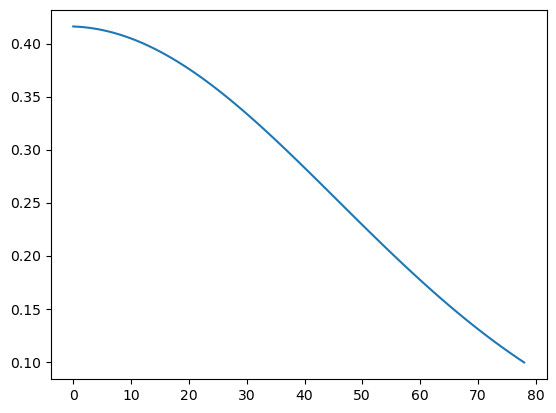

In [ ]:
name = "ALA"
i = 0
distance = np.array(list(Counter(wqeb.distances_to_center[name][i]).keys())).reshape(-1, 1)
X = np.concatenate((np.ones_like(distance), -1/2 * distance**2), axis=1)
plt.plot(np.exp(X @ wqeb.mus_mle[name]))

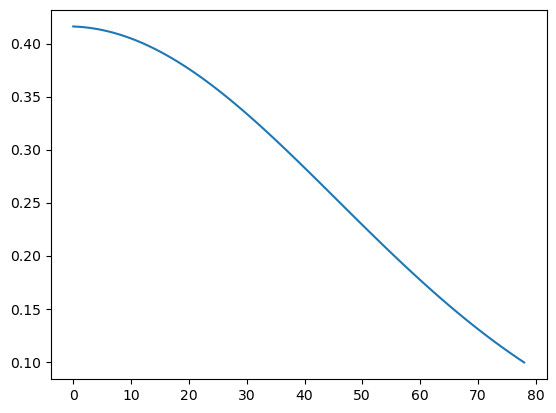

In [ ]:
plt.plot(np.exp(X @ wqeb.mus_mle[name]))

In [ ]:
np.sum(wqeb.betas_em[name] * np.repeat(wqeb.lambdas[name], 2).reshape(-1, 2), axis=0) / np.sum(wqeb.lambdas[name])

array([-0.84424106,  4.47301268])

In [ ]:
np.mus_mle[name]

AttributeError: module 'numpy' has no attribute 'mus_mle'

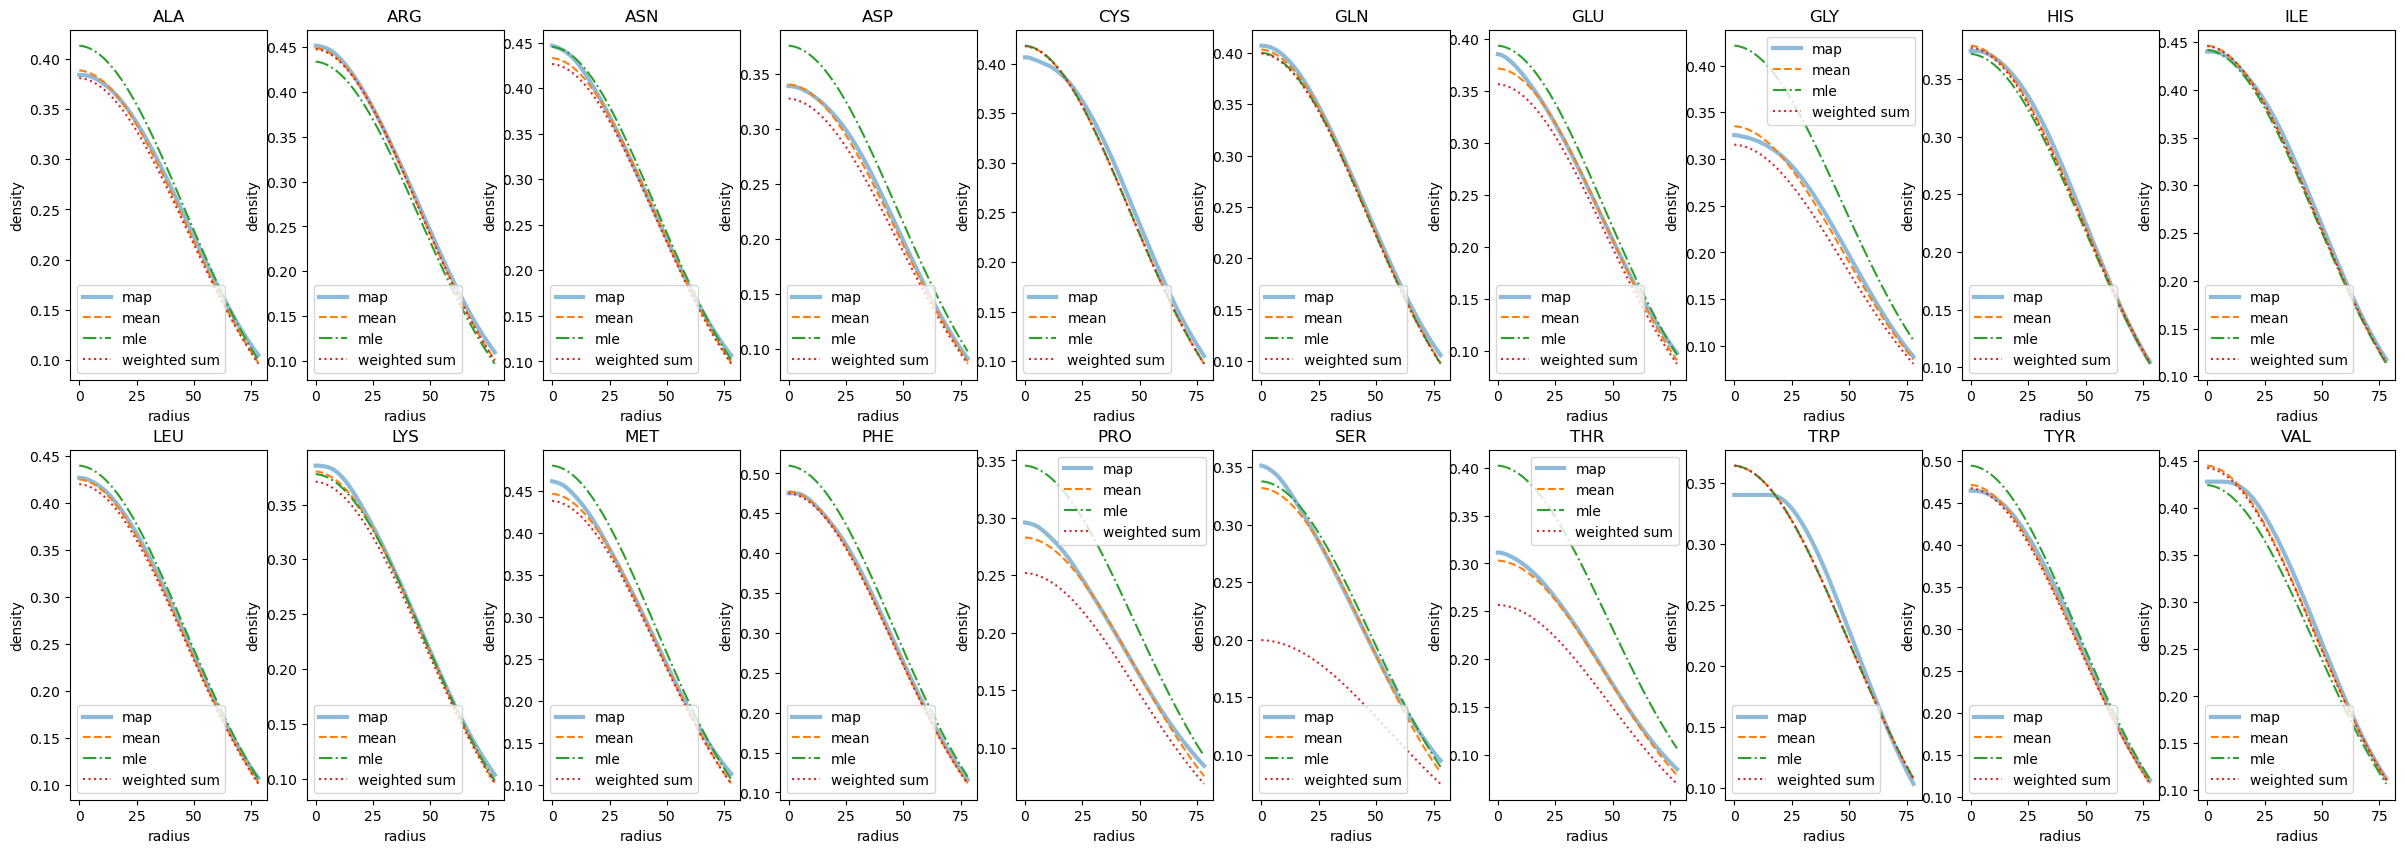

In [ ]:
# axes, fig = plt.subplots(10, 2, figsize=(10, 5))
import random
number_of_colors = 20
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])for i in range(number_of_colors)]
fig, axes = plt.subplots(2, 10, figsize=(30, 10))
for times, name in enumerate(wqeb.weighted_estimated_radius_density):
    # plt.figure(figsize=(8, 6))
    i = times // 10
    j = times % 10
    distance = np.array(list(Counter(wqeb.distances_to_center[name][0]).keys())).reshape(-1, 1)
    X = np.concatenate((np.ones_like(distance), -1/2 * distance**2), axis=1)
    weighted__betas_em = np.sum(wqeb.betas_em[name] * np.repeat(wqeb.lambdas[name], 2).reshape(-1, 2), axis=0) / np.sum(wqeb.lambdas[name])
    axes[i][j].plot(np.array(wqeb.radius_density[name]).mean(axis=0), label="map", linewidth=3, alpha=0.5)
    axes[i][j].plot(np.array(wqeb.weighted_estimated_radius_density[name]).mean(axis=0), label="mean", linestyle="--")
    axes[i][j].plot(np.exp(X @ wqeb.mus_mle[name]), label="mle", linestyle="-.")
    axes[i][j].plot(np.exp(X @ weighted__betas_em), label="weighted sum", linestyle=":")
    # plt.title(name)
    axes[i][j].set_xlabel("radius")
    axes[i][j].set_ylabel("density")
    axes[i][j].legend()
    axes[i][j].title.set_text(name)
plt.show()

In [ ]:
wqeb.mus_mle

{'ALA': array([-0.87660058,  4.59262477]),
 'ARG': array([-0.78994986,  4.73026486]),
 'ASN': array([-0.71501642,  4.80958684]),
 'ASP': array([-0.9851642 ,  4.29383163]),
 'CYS': array([-0.87361586,  4.67492292]),
 'GLN': array([-0.91810809,  4.5990282 ]),
 'GLU': array([-0.92666652,  4.50355831]),
 'GLY': array([-0.8690076 ,  4.40636273]),
 'HIS': array([-0.98773511,  4.14517375]),
 'ILE': array([-0.82277876,  4.40198261]),
 'LEU': array([-0.81039186,  4.5692218 ]),
 'LYS': array([-0.97889209,  4.32631076]),
 'MET': array([-0.71419118,  4.94367685]),
 'PHE': array([-0.67838404,  4.59379179]),
 'PRO': array([-1.04663851,  4.27632024]),
 'SER': array([-1.08426796,  4.3563413 ]),
 'THR': array([-0.9143432,  4.1516018]),
 'TRP': array([-1.01104346,  3.88229404]),
 'TYR': array([-0.70272213,  4.51152423]),
 'VAL': array([-0.85555125,  4.46891164])}

In [ ]:
wqeb.plot_data(max_rad=MAX_RAD, amino_acid="ALA")

In [ ]:
wqeb.lambdas

{'ALA': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'ARG': array([1., 1., 1., 1., 1., 1.]),
 'ASN': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'ASP': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'CYS': array([1., 1.]),
 'GLN': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'GLU': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'GLY': array([1., 1., 1., 1., 1., 1.]),
 'HIS': array([1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'ILE': array([1., 1., 1., 1., 1.]),
 'LEU': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.]),
 'LYS': array([1., 1., 1., 1., 1., 1., 1., 1.]),
 'MET': array([1., 1., 1., 1.]),
 'PHE': array([1., 1., 1., 1., 1.]),
 'PRO': array([1., 1., 1.]),
 'SER': array([1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'THR': array([1., 1., 1.]),
 'TRP': array([1.]),
 'TYR': array([1., 1., 1., 1., 1., 1., 1., 1.]),
 'VAL': array([1., 1., 1., 1., 1., 1.])}

In [ ]:
np.sum([np.diag(weight_matrix) for weight_matrix in wqeb.weight_matrixs["ARG"]], axis=1)

array([ 9.64056906, 10.30311278, 16.26903541,  6.88385489,  9.74026675,
        4.78045152])

In [ ]:
sum(np.diag(wqeb.weight_matrixs["ARG"][0]))

14.771551040153259

In [ ]:
wqeb.lambdas["ALA"]

array([9.86910618e-03, 7.21454557e-01, 8.80831148e+01, 2.81393345e-03,
       2.10461944e+01, 5.47358245e+02, 1.99384146e+02, 2.51712815e-01,
       3.97569654e+01, 6.55253284e+02, 4.32358810e-01])

In [ ]:
sum(np.diag(wqeb.weight_matrixs["ALA"][0]))

11085.148740234481

(array([ 27.,  27.,  30.,  42.,  83.,  63., 123., 106.,  79., 200.]),
 array([1.24477225e-10, 4.07131907e-03, 8.14263801e-03, 1.22139569e-02,
        1.62852759e-02, 2.03565948e-02, 2.44279138e-02, 2.84992327e-02,
        3.25705516e-02, 3.66418706e-02, 4.07131895e-02]),
 <BarContainer object of 10 artists>)

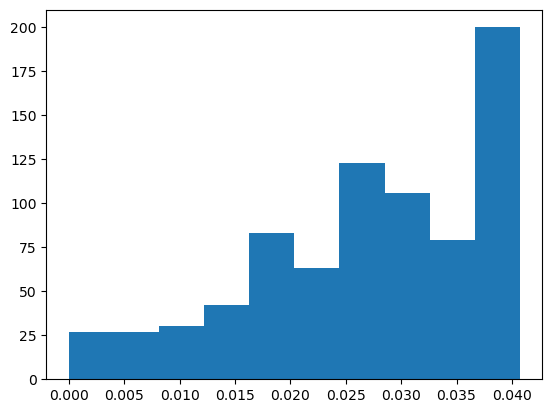

In [ ]:
plt.hist(np.diag(wqeb.weight_matrixs["ALA"][0]))

In [ ]:
wqeb.sigmas_median

{'ALA': array([[0.08296717],
        [0.00600139],
        [0.02039314],
        [0.01844067],
        [0.06198955],
        [0.01429305],
        [0.0129889 ],
        [0.01145318],
        [0.04682179],
        [0.01050427],
        [0.24638906]]),
 'ARG': array([[0.01342249],
        [0.01676857],
        [0.02634037],
        [0.01009092],
        [0.01643886],
        [0.00694597]]),
 'ASN': array([[0.01168207],
        [0.03012414],
        [0.02851927],
        [0.0271333 ],
        [0.0253392 ],
        [0.00386329],
        [0.02136898],
        [0.09683823],
        [0.11144845],
        [0.04235467]]),
 'ASP': array([[0.00415755],
        [0.11128924],
        [0.04922485],
        [0.03801172],
        [0.06412251],
        [0.1468876 ],
        [0.18449686],
        [0.08632697],
        [0.1081827 ],
        [0.03019127],
        [0.01896297],
        [0.05295359]]),
 'CYS': array([[0.00710726],
        [0.00763726]]),
 'GLN': array([[0.01800528],
        [0.00906062],
  